Biel Gonzàlez   NIU: 1551813

Judit Panisello NIU: 1605512

Cristina Soler  NIU: 1603542

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import time
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve, train_test_split, LeaveOneOut, RepeatedStratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from itertools import cycle

import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df = pd.read_csv('train.csv', header=0, delimiter=',')
test_df =  pd.read_csv('test.csv', header=0, delimiter=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Apartat B

## EDA

### Característiques de les dades:
Les característiques de les dades de test i de train són iguals, exceptuant per la columna Survived, ja que és la variable objectiu. Tenim entre el test i el train un total de 1309 files i 12 columnes diferents

### Descripció:
`PassengerID` : es l'única variable que no té cap tipus d'efecte amb la variable objectiu

`Survived` : és la variable objectiu, pot ser (0 o 1):

- 1 = Survived

- 0 = Not Survived

`Pclass` (Passenger Class): l'estatus socioeconòmic del passatger i és una variable ordinal categòrica que té 3 valors únics (1, 2 o 3):

- 1 = Upper Class

- 2 = Middle Class

- 3 = Lower Class

`Name`, `Sex` and `Age`: són el que el seu nom indica

`SibSp`: nombre total de germans i cònjuge dels passatgers

`Parch`: nombre total de pares i fills dels passatgers

`Ticket`: número de bitllet del passatger

`Fare`: tarifa del passatger

`Cabin`: número de cabina del passatger

`Embarked`: port d'embarcament i és una variable categòrica que té 3 valors únics (C, Q o S):

- C = Cherbourg

- Q = Queenstown

- S = Southampton


### Tipus:
Categorical:

- `Pclass` (ordinal)

- `Name` (nominal)

- `Sex` (nominal)

Numerical:

- `Age` (continua)

- `Fare` (continua)

- `SibSp` (discreta)

- `Parch` (discreta)

Mixed:

- `Ticket` (numèrica i alfanumèrica)

- `Cabin` (alfanumèrica)


### Anàlisi de nulls

In [3]:
print("Dades Train")
print(train_df.info())

print("\nDades Test")
print(test_df.info())

Dades Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dades Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

Del Train Data tenim:

- Age: 177 de 891 valors nuls (19.8% de nuls).
- Cabin: 687 de 891 nuls (77.1% de nuls).
- Embarked: 2 de 891 nuls.


Del Test Data tenim:

- Age: 86 de 418 nuls (20.5% de nuls).
- Cabin: 327 de 418 nuls (78.2% de nuls).
- Fare: 1 de 418 nuls.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D'aquí podrem observar que:

- La taxa de supervivència es del 38.3%
- Més del 75% dels passatgers estan per sobre dels 38 anys
- Hi ha molta gent gran
- Molts passatgers viatgen sols
- Tenim outliers a la característica Fare

### Ànalisi descriptiu

#### Variable objectiu:

La nostra variable objectiu és "Survived", podem veure que està composta per dues classes, és binària. Tenim llavors que si un passatger va sobreviure a l'accident del titànic, la classe és 1 i si va morir, és a dir no va sobreviure, la classe és 0.

Podem apreciar també en aquest gràfic que les proporcions de gent que va sobreviure i la que va morir no estan repartides de manera equitativa. Això té sentit perquè partim que va ser un accident i que, per tant, la quantitat de gent morta o viva no ha de seguir una repartició de cinquanta. Igualment, sí que podem veure que aproximadament dos terços de la gent va morir i el terç restant va sobreviure a l'enfonsament. El més probable després quan realitzem proves amb el test sigui que la majoria d'etiquetes assignades siguin zeros perquè és el dominant al train.

<AxesSubplot:ylabel='Survived'>

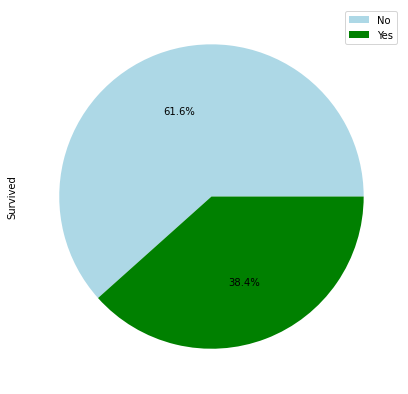

In [5]:
train_df.Survived.value_counts().plot.pie(colors = ['lightblue','Green'],
                                          legend='True',labeldistance=None,
                                         labels=['No','Yes'],
                                         figsize=(7,7),autopct='%1.1f%%')

Mirem supervivents primer per sexe, on tenim que dones i homes. Podem veure que la taxa de dones supervivents és de 74,2% i d'homes de 18,8%.

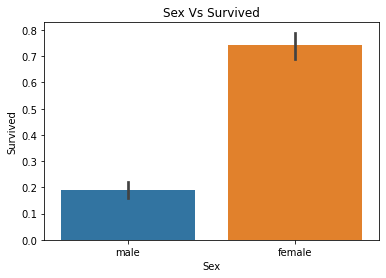

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
sns.barplot(data = train_df , x = 'Sex' , y = "Survived").set_title(f"{'Sex'} Vs Survived")
plt.show()
train_df[['Sex', "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

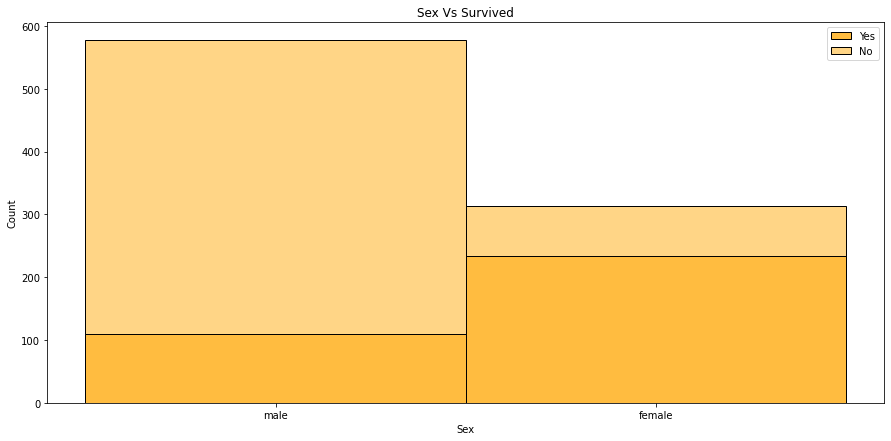

In [7]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df , x = 'Sex',
             hue = "Survived",binwidth=5,palette = sns.color_palette(["#ffc75e","#ffa600"])
             ,multiple = "stack").set_title(f"{'Sex'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

També mirem la supervivència segons la classe on es trobaven, i veiem que la gent que viatjava en primera classe un 69% d'aquesta va sobreviure, si viatjaven a segona classe van sobreviure un 47% i de tercera classe un 24%.

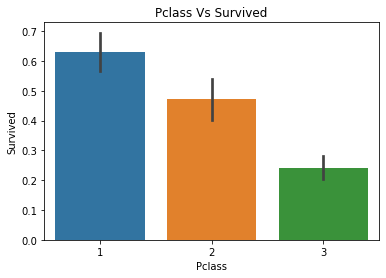

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
sns.barplot(data = train_df , x = 'Pclass' , y = "Survived").set_title(f"{'Pclass'} Vs Survived")
plt.show()
train_df[['Pclass', "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

Podem veure també les proporcions de les classes dels passatgers al titànic. Observem que més de la meitat dels passatgers eren a la tercera classe i que les proporcions de la primera i segona classe és més o menys similar.

<AxesSubplot:ylabel='Pclass'>

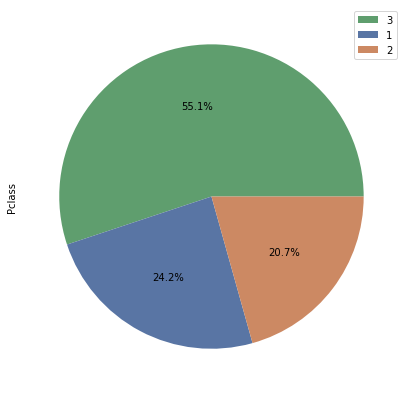

In [9]:
train_df.Pclass.value_counts().plot.pie(legend='True',labeldistance=None,
                                         figsize=(7,7),autopct='%1.1f%%',
                                       colors=["#5f9e6e","#5975a4","#cc8963"])

Mirem els supervivents per edat i sexe per veure si hi ha cap mena de relació

<AxesSubplot:title={'center':'Age histogram of the passengers'}, xlabel='Age of the passengers', ylabel='Count'>

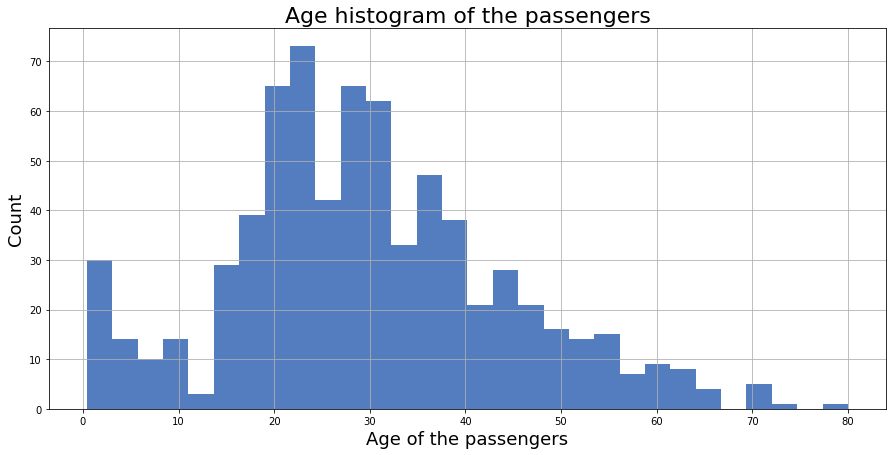

In [10]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train_df['Age'].hist(bins=30,color='#285cb0',alpha=0.8,figsize=(15,7))

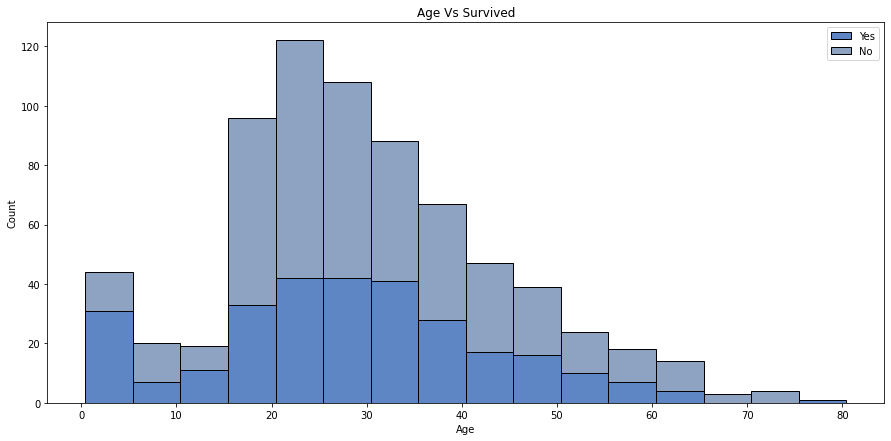

In [11]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df, x = 'Age',
             hue = "Survived",binwidth=5,palette = sns.color_palette(['#6883ad','#285cb0'])
             ,multiple = "stack" ).set_title(f"{'Age'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

També mirarem si el que van pagar pel bitllet la gent que estava al titànic té relació amb la seva supervivència.

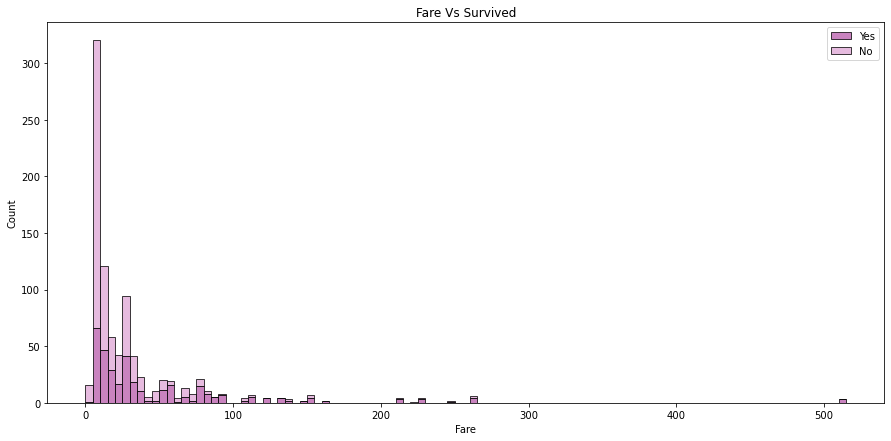

In [12]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df, x = 'Fare',
             hue = "Survived",binwidth=5,palette = sns.color_palette(['#dea4d5','#b85aaa'])
             ,multiple = "stack" ).set_title(f"{'Fare'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

A simple vista després de mirar aquests gràfics podem extreure una mica d'informació:

* En proporció van sobreviure més dones que homes a l'enfonsament.

* De la `PClass` 1 comparat amb les altres dues classes va sobreviure un percentatge major de gent a l'accident.

* Segons l'edat dels passatgers veiem que la proporció de nadons, entre zero i cinc anys, i de joves d'entre quinze i vint, va sobreviure una major proporció que la resta d'edats. Mentre que de la resta veiem la tendència observada a la gràfica circular, aproximadament un terç sobreviu i la resta mor.

* Amb relació a la variable `Fare` veiem que molts dels passatgers que van gastar més en el bitllet van sobreviure en major proporció que els que van comprar els més econòmics, la diferència és notable com podem apreciar a la gràfica i es poden apreciar outliers com ja s'ha comentat a l'inici.

### Correlació de les dades




<AxesSubplot:>

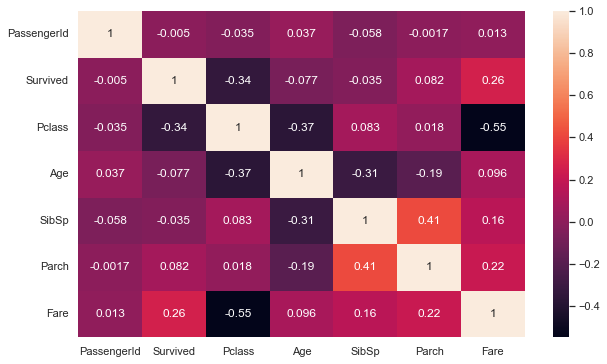

In [13]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_df.corr(), annot = True, fmt='.2g')

El que ens interessa es la correlació de les dades amb la variable objectiu `Survived`. Com podem veure la correlació és negativa amb les variables `PClass`, `Age`, `SibSp`, també amb `PassangerID` pero la correlació es molt pròxima a 0. Les variables `Parch` i `Fare` tenen correlació positiva tot i que la de `Parch` també es molt pròxima a 0.

## Preprocessing

Veiem que les nostres dades no estan normalitzades i que l'única que sembla una normal és la variable `Age`. També podem veure que al tenir tantes variables categòriques no tindria massa sentit normalitzar aquestes, se'ls hi hauria de fer un one-hot. A les que són discretes, però no són categòriques mirarem més endavant si ens surt a compte normalitzar-les.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

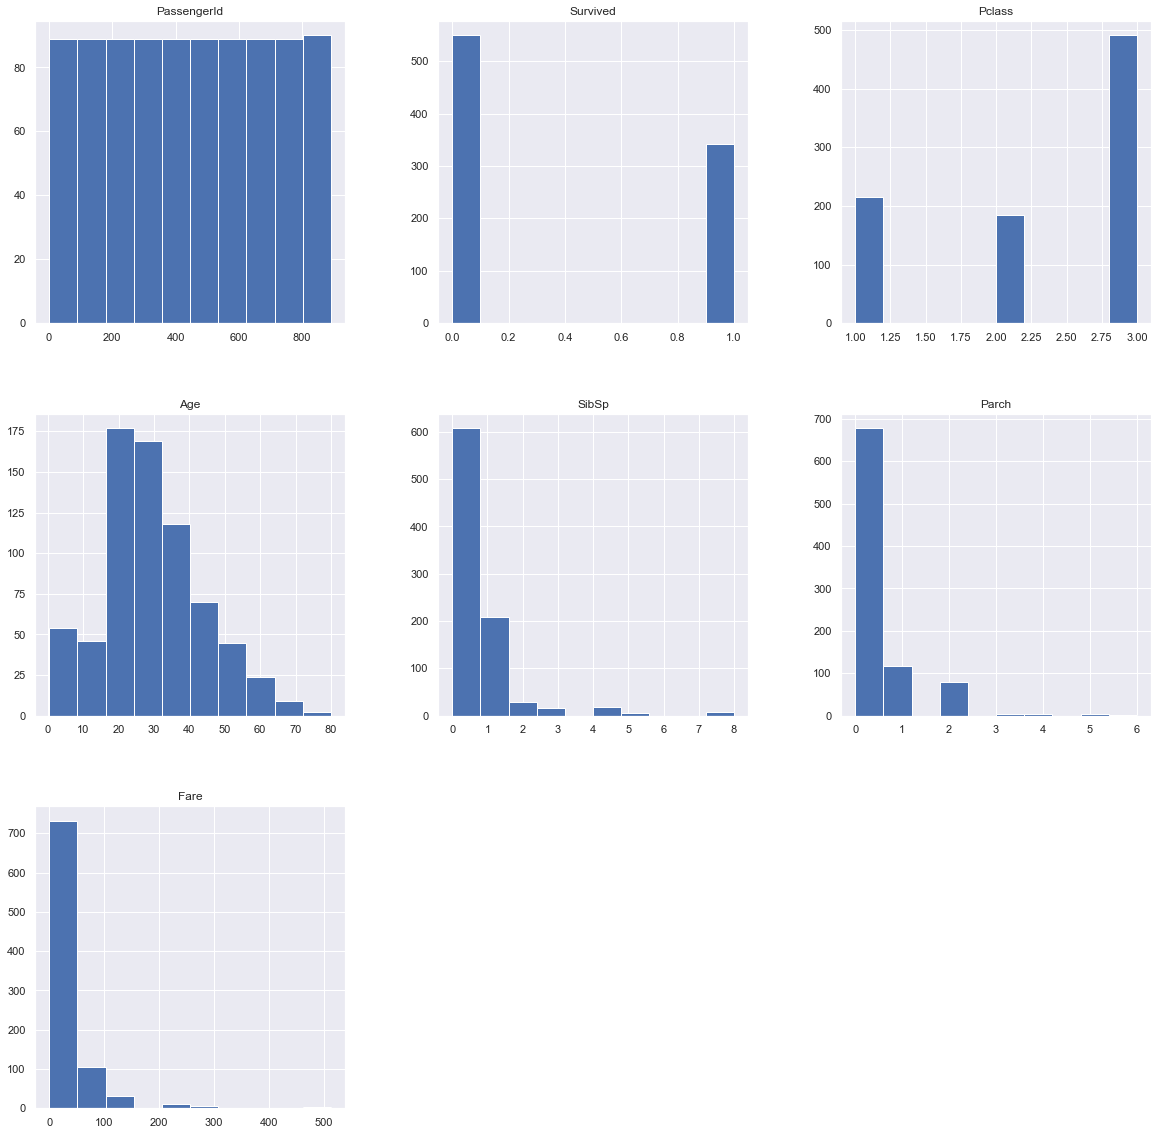

In [14]:
train_df.hist(figsize=(20,20))

### Eliminació de variables

Eliminem les variables que considerem que no seran necessaries o que no ens seran útils per la classificació, com les variables `PassengerId` i `Ticket`

In [15]:
train_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [16]:
test_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

### Tractament de nuls
Hem de realitzar un tractament de nuls per tenir les columnes amb totes les variables necessaries, per això omplirem la columna d'edat segons la classe on estan situats

In [17]:
f_class_Age=train_df.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

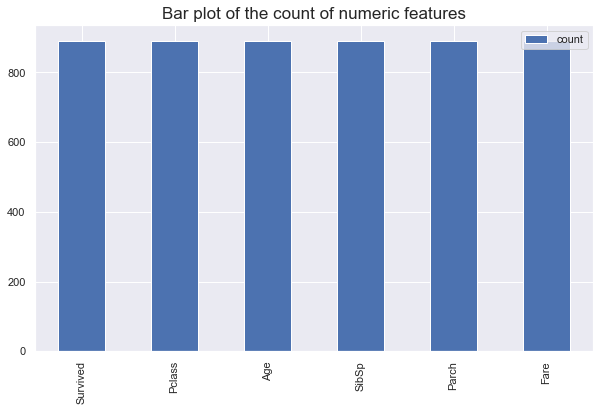

In [18]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
d=train_df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [19]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
test_df.drop('Cabin',axis=1,inplace=True)
test_df.dropna(inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Fem un clean de les dades per millorar el processament del dataframe

In [21]:
data_cleaner = [train_df, test_df]

In [22]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


També transformarem la variable `Title` en valors discrets per després poder fer un one-hot

In [24]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data_cleaner:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [25]:
train_df.drop(['Name'], axis=1 , inplace = True)
test_df.drop(['Name'], axis=1 , inplace = True)    

Comprovem que ja no tenim valors nuls al dataset

In [26]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64
--------------------
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,1.0
1,1,1,female,38.0,1,0,71.2833,C,2,0,3.0
2,1,3,female,26.0,0,0,7.9250,S,1,1,2.0
3,1,1,female,35.0,1,0,53.1000,S,2,0,3.0
4,0,3,male,35.0,0,0,8.0500,S,1,1,1.0


### One-Hot de les variables categoriques
Apliquem un one-hot encoder a les columnes: `Embarked`, `Sex`, `Title` i `Pclass` per així poder fer-les servir amb un impacte real i amb sentit a la classificació que farem posteriorment.

In [28]:
transformer=make_column_transformer((OneHotEncoder(),['Sex','Embarked','Title',
                                    'Pclass']),remainder='passthrough')
transformed=transformer.fit_transform(train_df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [29]:
transformed_df=transformed_df.rename(columns={'onehotencoder__x0_female': 'female',
'onehotencoder__x0_male':'male', 'onehotencoder__x1_C':'C', 'onehotencoder__x1_Q':'Q',
'onehotencoder__x1_S':'S','onehotencoder__x2_0.0':'None','onehotencoder__x2_1.0':'Mr',
'onehotencoder__x2_2.0':'Miss','onehotencoder__x2_3.0':'Mrs','onehotencoder__x2_4.0':'Master',
'onehotencoder__x3_1':'C1','onehotencoder__x3_2':'C2','onehotencoder__x3_3':'C3'})

In [30]:
transformed_df.head()
train_df=transformed_df.copy()

In [31]:
transformer=make_column_transformer((OneHotEncoder(),['Sex','Embarked','Title',
                                    'Pclass']),remainder='passthrough')
transformed=transformer.fit_transform(test_df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [32]:
transformed_df=transformed_df.rename(columns={'onehotencoder__x0_female': 'female',
'onehotencoder__x0_male':'male', 'onehotencoder__x1_C':'C', 'onehotencoder__x1_Q':'Q',
'onehotencoder__x1_S':'S','onehotencoder__x2_0.0':'None','onehotencoder__x2_1.0':'Mr',
'onehotencoder__x2_2.0':'Miss','onehotencoder__x2_3.0':'Mrs','onehotencoder__x2_4.0':'Master',
'onehotencoder__x3_1':'C1','onehotencoder__x3_2':'C2','onehotencoder__x3_3':'C3'})

In [33]:
test_df = transformed_df
test_df.head()

,female,male,C,Q,S,None,Mr,Miss,Mrs,Master,C1,C2,C3,Age,SibSp,Parch,Fare,FamilySize,IsAlone
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.5,0.0,0.0,7.8292,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,47.0,1.0,0.0,7.0000,2.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0,0.0,0.0,9.6875,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,8.6625,1.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,1.0,1.0,12.2875,3.0,0.0


In [34]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

female        0
male          0
C             0
Q             0
S             0
None          0
Mr            0
Miss          0
Mrs           0
Master        0
C1            0
C2            0
C3            0
Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
IsAlone       0
dtype: int64
--------------------
female        0
male          0
C             0
Q             0
S             0
None          0
Mr            0
Miss          0
Mrs           0
Master        0
C1            0
C2            0
C3            0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
IsAlone       0
dtype: int64


### Apliquem un PCA a la model


Aplicar una PCA ens serveix per reduir, si és possible, la dimensionalitat del nostre model per evitar que es produeixi un overfiting. Els inconvenients d'aplicar-lo són que la PCA està molt influenciada pels outliners del dataset i si el nostre dataset té molts, pot no anar molt bé l'aplicació d'un PCA en el nostre dataset.

En el nostre cas aplicar un PCA podria ser interessant a l'hora de tractar el dataset. Un cop aplicat sobre el classificador logístic, el qual tenim el codi en l'apartat 3 juntament amb el codi del classificador, la PCA amb 0.90 i 0.95 veiem que aplicar una variància al PCA de 0.9 no ens dona tan bé com en aplicar una del 0.95 i amb aquesta obtenim una reducció de la dimensionalitat de 19 a 11 atributs per la X sense modificar el resultat del nostre accuracy.

Probem a fer un PolinomialFeature


In [35]:
idx = train_df.sample(frac=0.7).index
df_train = train_df[train_df.index.isin(idx)]
df_test = train_df[~train_df.index.isin(idx)]

x_train_df = df_train[['female', 'male', 'C', 'Q', 'S', 'None', 'Mr', 'Miss', 'Mrs', 'Master','C1', 'C2', 'C3', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']]
y_train_df = df_train['Survived']

x_test_df = df_test[['female', 'male', 'C', 'Q', 'S', 'None', 'Mr', 'Miss', 'Mrs', 'Master','C1', 'C2', 'C3', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']]
y_test_df = df_test['Survived']

print(f"Train: {df_train.shape}")
print(f"Test: {df_test.shape}")

Train: (622, 20)
Test: (267, 20)


>1 0.715 (0.052)
>2 0.697 (0.062)
>3 0.689 (0.061)
>4 0.694 (0.066)


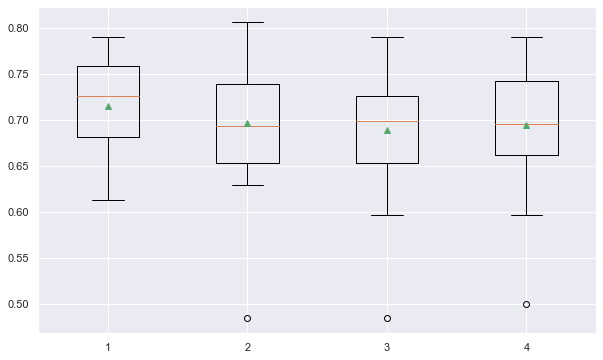

In [36]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(1,5):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Definim el dataset
X = df_train[['female', 'male', 'C', 'Q', 'S', 'None', 'Mr', 'Miss', 'Mrs', 'Master','C1', 'C2', 'C3', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']]
y = df_train['Survived']

# evaluem el model
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Veiem que en aplicar un `PolynomialFeatures` en diferents graus no ens millora la classificació això és pel fet que el nostre dataset no és tan senzill com que amb un `PolynomialFeatures` es relacionin bé les dades i necessitem tècniques més complexes per fer el model.

### CrossValidation

És una tècnica que ens permet garantir la independència entre les dades d'entrenament i de prova quan avaluem els resultats d'una anàlisi estadística. Per tant, si volem tenir uns bons resultats i garantir i validar la qualitat de la informació que ens estan donant les nostres classificacions és molt útil realitzar aquest procediment.

En el nostre cas estem fent servir una Cross Validation amb K-folds, això vol dir que dividim les nostres dades d'entrenament en K subconjunts d'entrenament, un de prova i K-1 d'entrenament. Es fa el procediment de validació amb cada subconjunt d'entrenament i després s'extreuen els resultats obtinguts fent la mitjana. Es pot veure que estem fent servir `k=10` que és una de les més utilitzades. Més específicament nosaltres fem servir un Stratified K-fold, aquest tipus de K-fold intenta preservar dins del possible el ràtio de classes que tenim al nostre dataset, que en aquest cas serien aproximadament dos terços de morts i un terç de vius, normalment aquest tipus de K-fold dona bons resultats.

El Leave One Out és un cas especial del k-fold, en aquest cas tindrem tants folds com nombre de files al nostre dataset, aquest mètode és millor quan tenim datasets petits. Consisteix a dividir en entrenament i prova igual que en la resta de Cross Validations, però aquí està la diferència, i és que la prova només serà d'un element i l'entrenament contindrà la resta d'elements, és per això que funciona millor en datasets petits. No creiem que el nostre dataset sigui adequat per realitzar aquest tipus de Cross Validation, però igualment com veurem més endavant si ho provem per exemple amb la logística, ens trobem que no millora res respecte al Stratified K-fold que és el que farem servir en tots.

S'ha de tenir en compte que no sempre que tinguem més dades seran millors els resultats, si tenim més dades i aquestes són bones llavors segurament els nostres resultats milloraran, però si tenim més dades i aquestes són molt variables ens poden complicar en excés els resultats. Per tant, és millor tenir un bon conjunt de dades de qualitat que no un gran conjunt de dades de mala qualitat. Igualment, si el dataset és massa petit, pot provocar que es produeixi overfiting amb facilitat per molt que les dades siguin bones.

## Metric Analisis
### Accuracy Score

És la ràtio d'elements encertats a l'hora de realitzar la classificació. És a dir les prediccions iguals als valors reals dividits entre el nombre total de prediccions.

Es podria escriure tal que:

$Acc=\frac{TP+TN}{TP+FP+TN+FN}$

### F1 score

És un mètode per puntuar la precisió d'una classificació binària i es calcula a partir de la precisió i la recall d'una classificació si desenvolupem la fórmula obtenim:

$F_1=2\frac{Prec\cdot Rec}{Prec+Rec}=\frac{2TP}{2TP+FP+FN}$

Per tant, tenim que és una relació entre els veritables positius, els falsos positius i els falsos negatius. En aquest cas ens resulta útil, ja que estem realitzant una classificació binària. També cal comentar que com més proper el valor a u, el màxim que pot donar, millor és la nostra classificació.

### Average precision score

Sintetitza la corba de precision-recall com una mitjana ponderada de les precisions obtingudes a cada llindar. La fórmula és:

$AP=\sum_n{(R_n-R_{n-1})P_n}$

On $P_n$ i $R_n$ són la precisió i el recall al llindar $n$. S'ha de tenir en compte que el $AP$ no és el mateix que calcular l'àrea per sota de la corba de la Precision-Recall.

### ROC

Ens dona la relació entre els veritables positius i els falsos positius de la nostra classificació. Com més proper el valor de l'àrea a u millor serà la nostra classificació, si és menor o igual a 0.5 vol dir que la nostra classificació és pitjor que llençar una moneda a l'aire.

### Precision Recall

Ens dona la relació entre la sensibilitat i la precisió de la nostra classificació. On la sensibilitat són els veritables positius dividits entre la suma de veritables positius i falsos negatius i la precisió és el nombre de veritables positius dividit entre el nombre de veritables positius i el nombre de falsos positius.

$Sens=\frac{TP}{TP+FN}$

$Prec=\frac{TP}{TP+FP}$

### Model Selection + CrossValidation + Metric Analysis + Hyperparameter Search

Per tractar cada model hem decidit crear un codi genèric  que ens serveixi per a tots els models, aplicant petites modificacions requerides per aquests. Aquest codi ens aplicarà un `GridSerach`, el qual ens buscarà els millors hiperparàmetres i també aplicarà el `Kfold`. La sortida que obtindrem és:

- Precisió obtinguda sense cross validation

- Precisió obtinguda amb cross validation

- Roc score

- F1 score

- Matriu de confusió

- Corba ROC

- Importància dels predictors a cada model


In [37]:
from itertools import cycle

def plot_features(importance, Features):
    #Features<-df.columns
    coef_dict = {}
    for coef, feat in zip(importance,Features):
        coef_dict[feat] = coef  
        
    cycol = cycle(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
                  'tab:gray','tab:olive','tab:cyan'])
    colors=[]
    for i in range(0,len(Features)):
        colors.append(next(cycol))

    plt.figure(figsize=(25,15))
    plt.bar(coef_dict.keys(),coef_dict.values(),color=colors) 

In [38]:
x_train = StandardScaler().fit_transform(train_df.drop(columns=['Survived']))
y_train = train_df['Survived'].values
#x_test = StandardScaler()
print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
#print('X_test shape: {}'.format(x_test.shape))

X_train shape: (889, 19)
y_train shape: (889,)


In [39]:
random_state = 2
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_state)
Y_test = Y_test.reshape(-1,1)

In [40]:
Targeted_feature = train_df["Survived"]
all_features = train_df.drop("Survived",axis=1)

### Regressió Logística



Logistic Regression
Accuracy without Grid and crossvalidation:  79.21
Fitting 10 folds for each of 5 candidates, totalling 50 fits
      solver  Accuracy
0  newton-cg  0.829656
1      lbfgs  0.829656
2  liblinear  0.831064
3        sag  0.829656
4       saga  0.829656
The cross validated score for Logistic Regression is: 83.11
ROC score is:  0.8510151942987765
f1 score is: 0.7911404637333105
Execution time: 0.28441381454467773  seconds


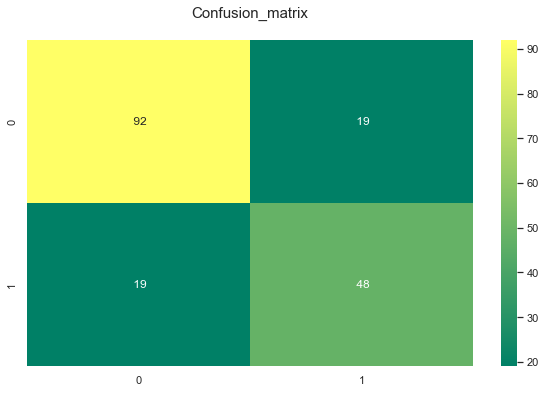

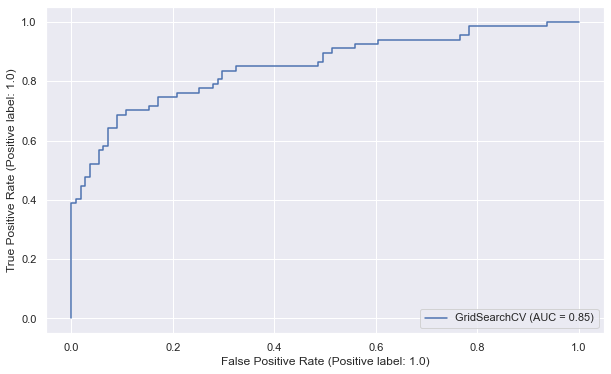

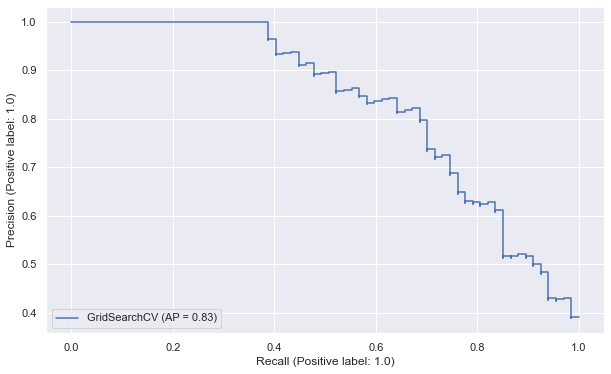

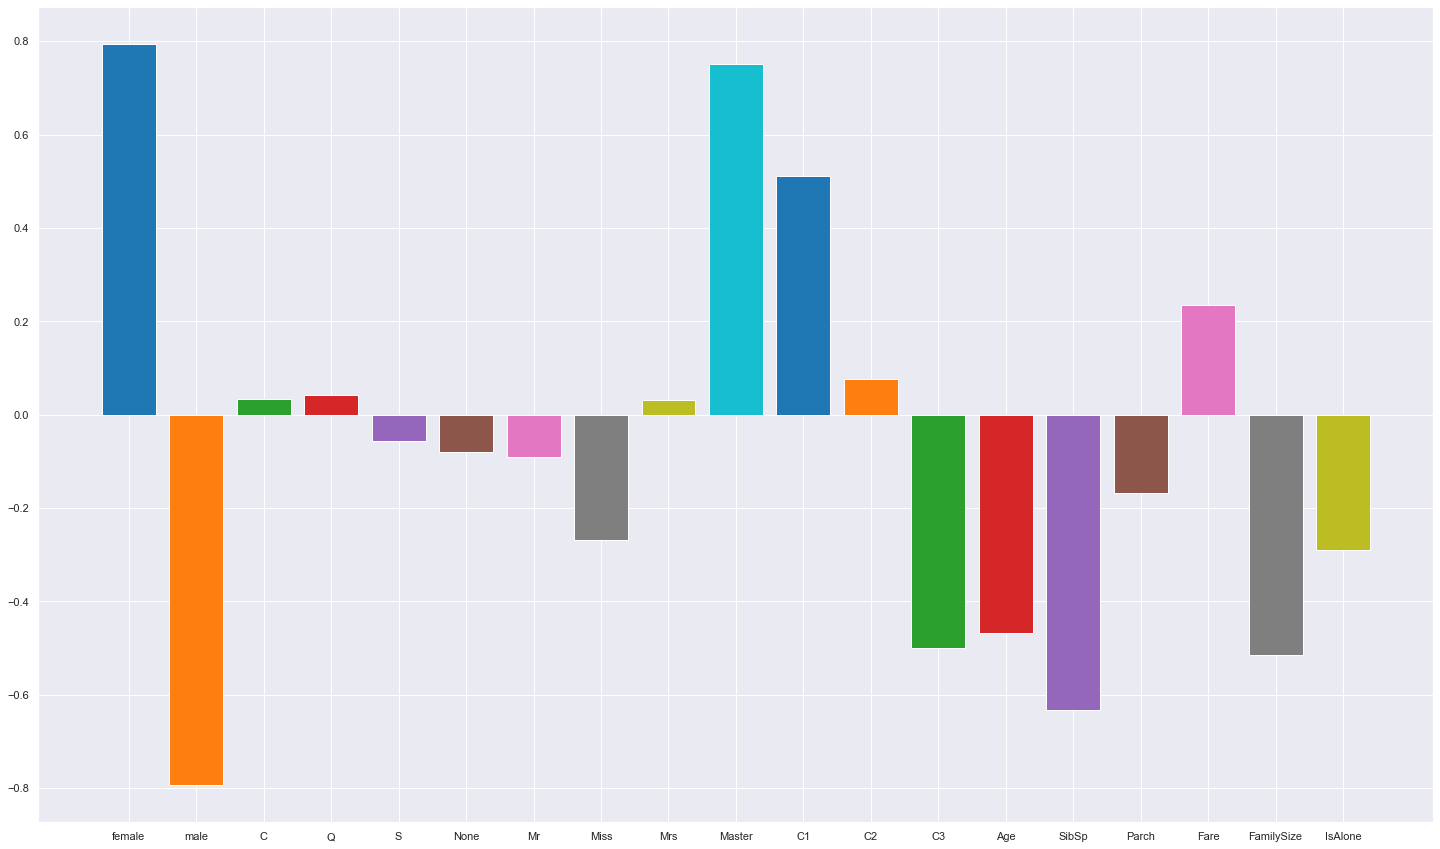

In [41]:
print("Logistic Regression")

start_t=time.time()
log_param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

LogReg = LogisticRegression()
LogReg = GridSearchCV(LogReg, log_param_grid, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

LogReg.fit(X_train,Y_train)
prediction_rm=LogReg.predict(X_test)
print(pd.concat([pd.DataFrame(LogReg.cv_results_["params"]),pd.DataFrame(LogReg.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=LogReg.best_score_
print('The cross validated score for Logistic Regression is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(LogReg.best_estimator_,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
y_pred_proba = LogReg.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(LogReg,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(LogReg,X_test,Y_test)
f1 = metrics.f1_score(Y_test, LogReg.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_L=time.time() - start_t
print("Execution time:",Et_L," seconds")
plot_features(LogReg.best_estimator_.coef_[0],train_df.columns.drop("Survived"))

A partir d'aquí extraiem els resultats de la regressió logística. A partir del `GridSearchCV` podem observar que el `solver` de la regressió que obté millor precisió és el `liblinear`, aquest permet fer servir dos penalitzacions la `l1` i la `l2`. I tenim que l'accuracy que ens dona és de 83.11% quan ho comparem amb l'accuracy que aconseguim sense el `GridSearchCV` i el `StratifiedKFold` que és un 79.21% ens adonem que ha augmentat gairebé un 4%.

Si ens fixem després en la matriu de confusió, veiem que la majoria de prediccions són correctes i que més o menys la proporció d'errors tant en positius com en negatius és semblant, si ens fixem en els encerts, podem veure la proporció que comentem a l'inici del treball amb el `Survived` real, un terç de supervivents i dos terços de morts.

Si ens fixem en les gràfiques del ROC i la Precisió-Recal ens podem fixar que la del ROC ens dona una àrea major, més específicament un 0.02 d'àrea més. Podem dir d'aquí que la classificació dona més o menys uns resultats molt regulars i que les diferències entre el ratio de precisió i sensibilitat, i el ratio entre veritables positius i falsos positius no és molt elevada.

També podem veure a quines features dona més importància la nostra classificació, en aquest cas són: `Female`,`Male`, `Master`, `C1`, `C2`, `Age`, `SibSp` i `FamilySize`

Proba del PCA Amb un 90% de variància

In [42]:
pca_best = PCA(0.9)
X_train90 = pca_best.fit_transform(X_train)
X_test90 = pca_best.transform(X_test)

print(f"Best PCA obtained with {len(pca_best.singular_values_)} components")

Best PCA obtained with 9 components


Logistic Regression
Accuracy without Grid and crossvalidation:  78.65
Fitting 10 folds for each of 5 candidates, totalling 50 fits
      solver  Accuracy
0  newton-cg  0.831103
1      lbfgs  0.831103
2  liblinear  0.831103
3        sag  0.831103
4       saga  0.831103
The cross validated score for Logistic Regression is: 83.11
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
ROC score is:  0.8627134597283851
f1 score is: 0.785121729220

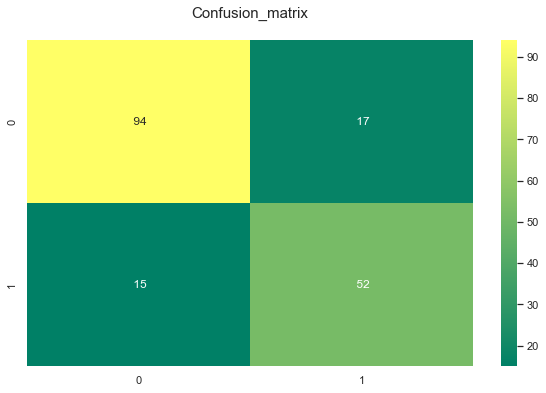

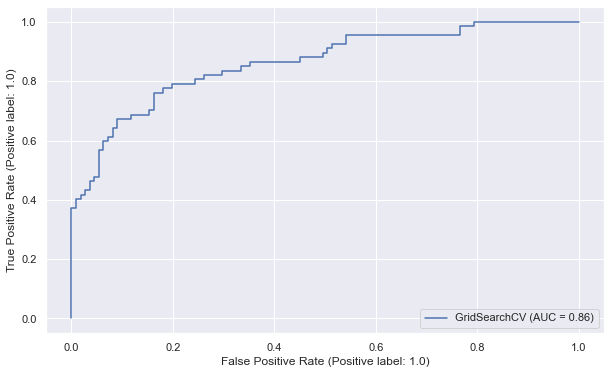

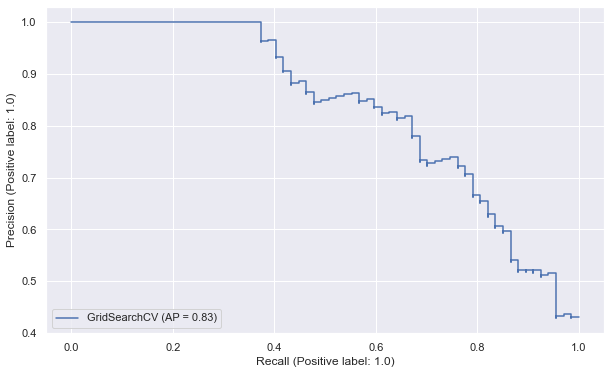

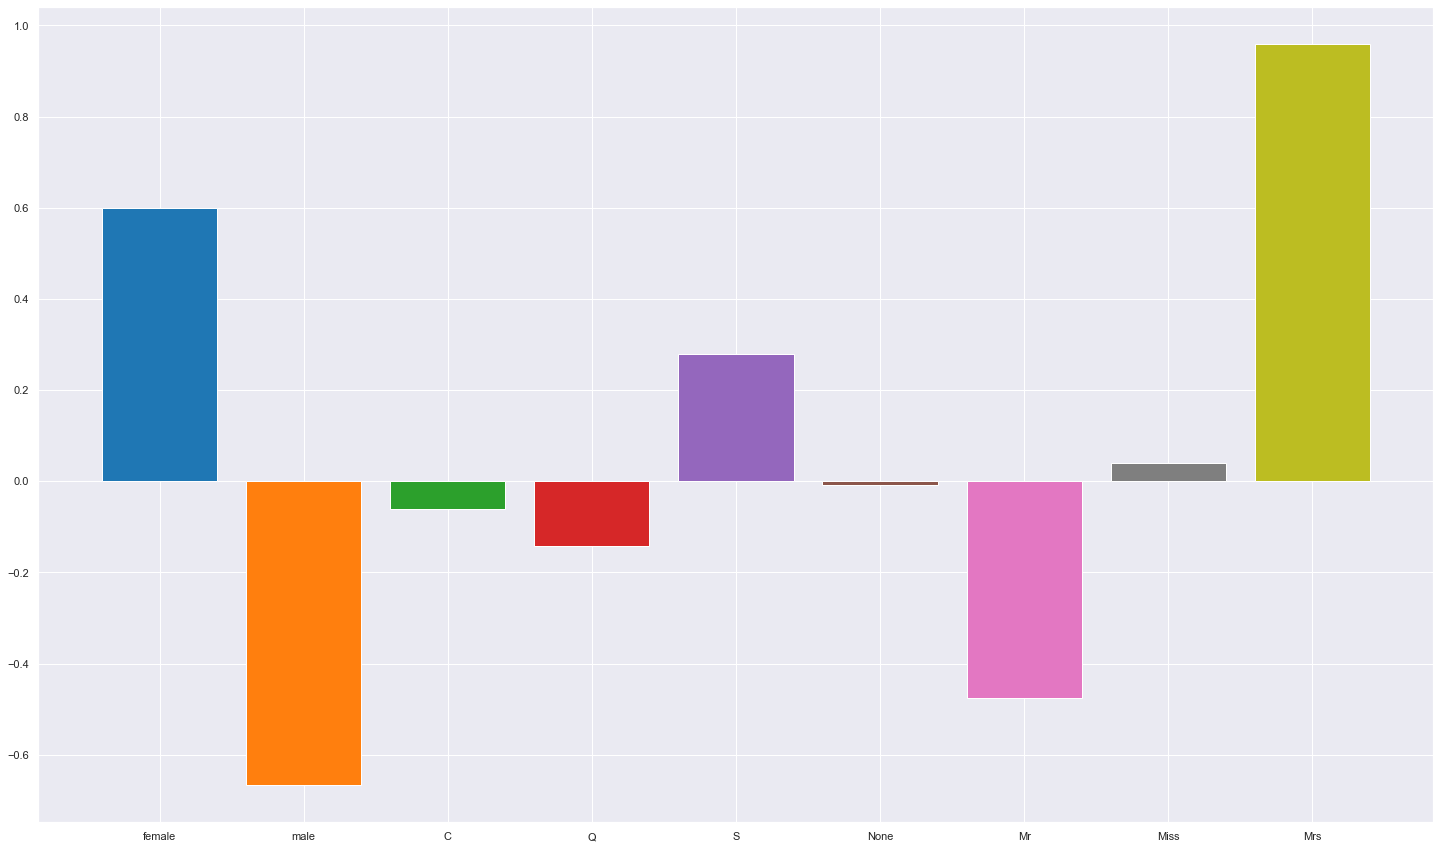

In [43]:
print("Logistic Regression")

start_t=time.time()
log_param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
model.fit(X_train90,Y_train)
prediction_rm=model.predict(X_test90)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

LogReg = LogisticRegression()
LogReg = GridSearchCV(LogReg, log_param_grid, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

LogReg.fit(X_train90,Y_train)
prediction_rm=LogReg.predict(X_test90)
print(pd.concat([pd.DataFrame(LogReg.cv_results_["params"]),pd.DataFrame(LogReg.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=LogReg.best_score_
print('The cross validated score for Logistic Regression is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(LogReg,X_test90,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = LogReg.predict_proba(X_test90)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
logROC = metrics.RocCurveDisplay.from_estimator(LogReg,X_test90,Y_test)
print(logROC)
logPres = metrics.PrecisionRecallDisplay.from_estimator(LogReg,X_test90,Y_test)
print(logPres)
f1 = metrics.f1_score(Y_test, LogReg.predict(X_test90), average='weighted')
print("f1 score is:", f1)
print("Execution time:",(time.time() - start_t)," seconds")

plot_features(LogReg.best_estimator_.coef_[0],train_df.columns.drop("Survived"))

Proba del PCA Amb un 95% de variància

In [44]:
pca_best = PCA(0.95)
X_train95 = pca_best.fit_transform(X_train)
X_test95 = pca_best.transform(X_test)

print(f"Best PCA obtained with {len(pca_best.singular_values_)} components")

Best PCA obtained with 11 components


Logistic Regression
Accuracy without Grid and crossvalidation:  79.21
Fitting 10 folds for each of 5 candidates, totalling 50 fits
      solver  Accuracy
0  newton-cg  0.831103
1      lbfgs  0.831103
2  liblinear  0.829695
3        sag  0.831103
4       saga  0.831103
The cross validated score for Logistic Regression is: 83.11
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
ROC score is:  0.8574694097082156
f1 score is: 0.791140463733

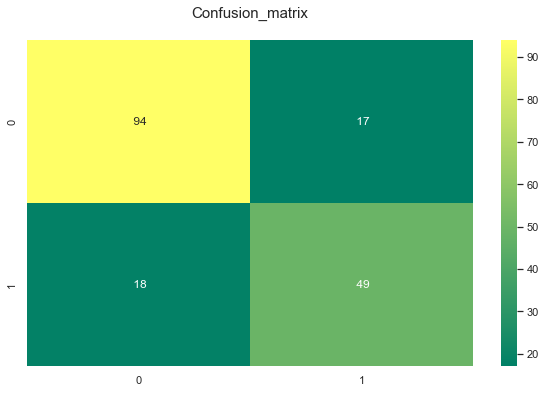

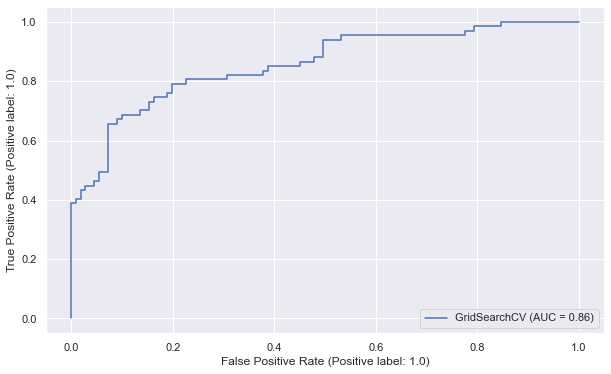

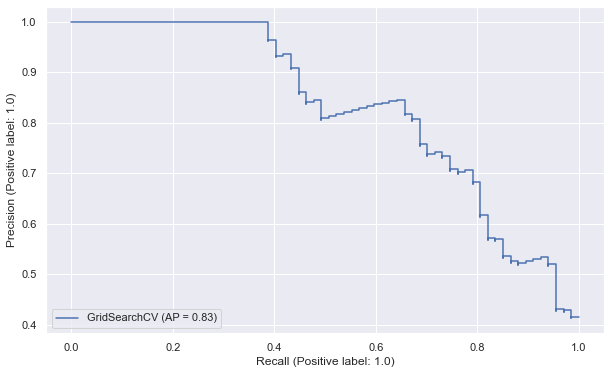

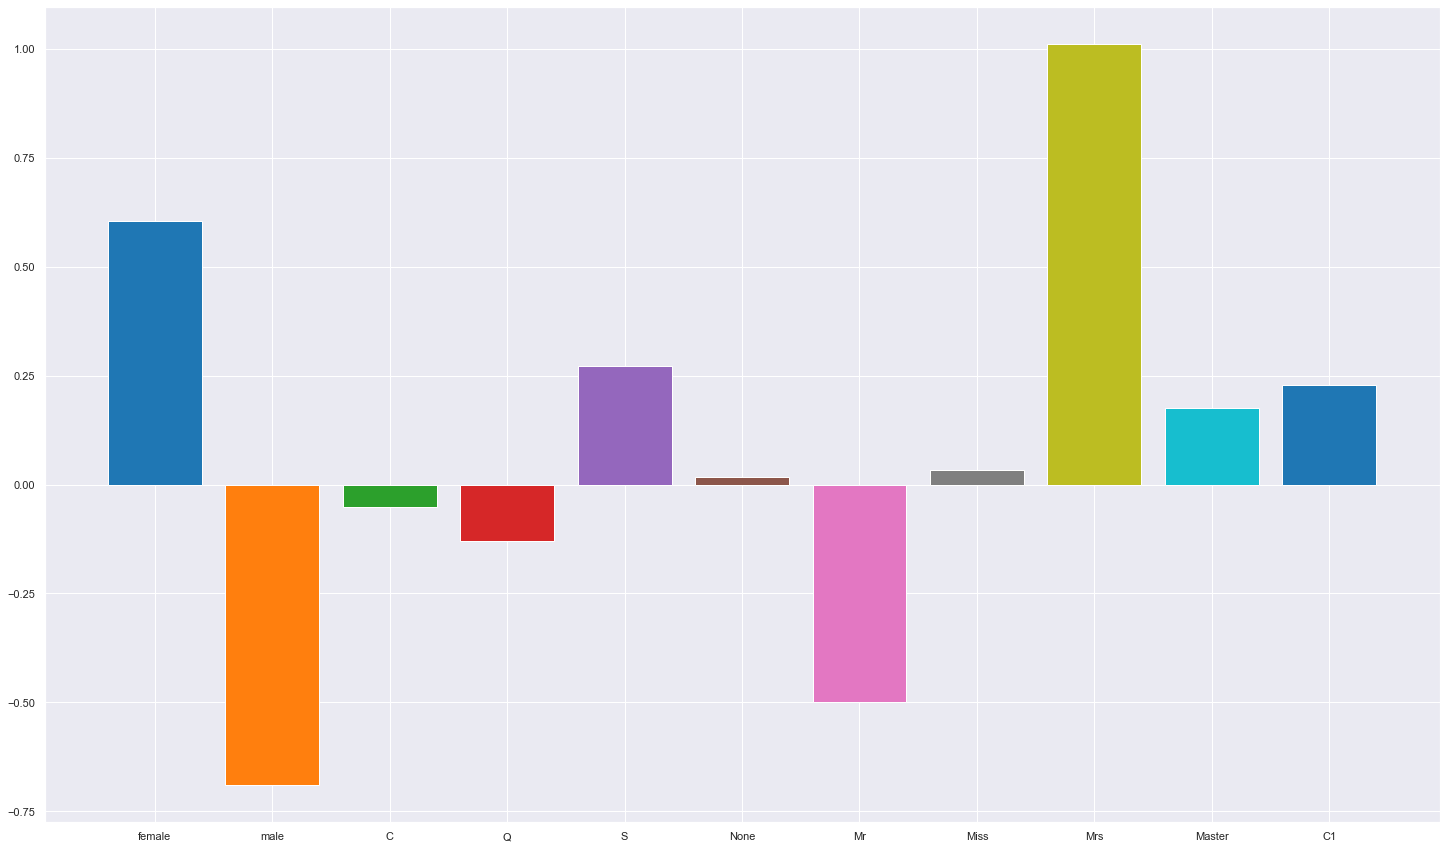

In [45]:
print("Logistic Regression")

start_t=time.time()

log_param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
model.fit(X_train95,Y_train)
prediction_rm=model.predict(X_test95)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

LogReg = LogisticRegression()
LogReg = GridSearchCV(LogReg, log_param_grid, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

LogReg.fit(X_train95,Y_train)
prediction_rm=LogReg.predict(X_test95)
print(pd.concat([pd.DataFrame(LogReg.cv_results_["params"]),pd.DataFrame(LogReg.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=LogReg.best_score_
print('The cross validated score for Logistic Regression is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(LogReg,X_test95,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = LogReg.predict_proba(X_test95)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(LogReg,X_test95,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(LogReg,X_test95,Y_test)
f1 = metrics.f1_score(Y_test, LogReg.predict(X_test95), average='weighted')
print("f1 score is:", f1)
print("Execution time:",(time.time() - start_t)," seconds")

plot_features(LogReg.best_estimator_.coef_[0],train_df.columns.drop("Survived"))

### Logistica amb LOOCV

Logistic Regression
Accuracy without Grid and crossvalidation:  79.21
Fitting 711 folds for each of 5 candidates, totalling 3555 fits
      solver  Accuracy
0  newton-cg  0.828411
1      lbfgs  0.828411
2  liblinear  0.828411
3        sag  0.828411
4       saga  0.828411
The cross validated score for Logistic Regression  with LOOCV is: 82.84
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 160 folds for each of 5 candidates, totalling 800 fits
Fitting 161 folds for each of 5 candidates, totalling 805 fits
Fitting 161 folds for each of 5 candidates, totalling 805 fits
ROC score is:  0.851015194

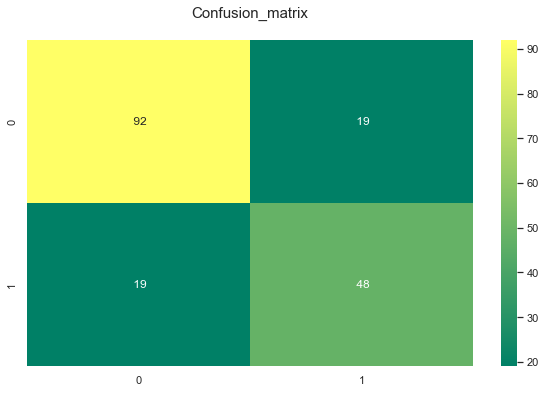

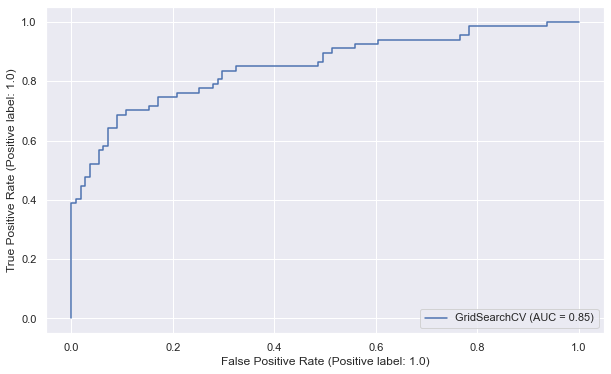

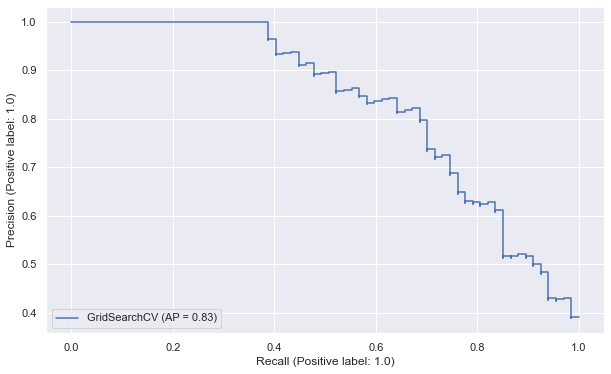

In [46]:
from sklearn.inspection import permutation_importance
print("Logistic Regression")
start_t=time.time()

log_param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

LogReg = LogisticRegression()
LogReg = GridSearchCV(LogReg, log_param_grid, cv = LeaveOneOut(),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

LogReg.fit(X_train,Y_train)
prediction_rm=LogReg.predict(X_test)
print(pd.concat([pd.DataFrame(LogReg.cv_results_["params"]),pd.DataFrame(LogReg.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=LogReg.best_score_
print('The cross validated score for Logistic Regression  with LOOCV is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(LogReg,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = LogReg.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(LogReg,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(LogReg,X_test,Y_test)
f1 = metrics.f1_score(Y_test, LogReg.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_LL=time.time() - start_t
print("Execution time:",Et_LL," seconds")

Podem veure que les precissions que ens dona ara la logística són totes iguals, a nivell de quin `solver` utilitzar. Això és perquè fem molts folds. Tot i això, l'accuracy més gran que obtenim és amb l'anterior i el temps de l'anterior també és més ràpid, per tant, tampoc ens és massa útil fer servir el LOOCV. Això amb mètodes que triguen encara més com pot ser un arbre de decisions pot significar un augment de temps tan gran que ja directament ens penalitzaria més del que podria fer, ja que no millora la precisió.

### Perceptron

És un algorisme per aprenentatge supervisat per problemes de classificació binaris, realitza una classificació lineal.

Perceptron
Accuracy without Grid and crossvalidation:  48.88
Fitting 10 folds for each of 20 candidates, totalling 200 fits
      eta0  max_iter  Accuracy
0   0.0001         1  0.746694
1   0.0001        10  0.722985
2   0.0001       100  0.722985
3   0.0001      1000  0.722985
4   0.0010         1  0.746694
5   0.0010        10  0.722985
6   0.0010       100  0.722985
7   0.0010      1000  0.722985
8   0.0100         1  0.746694
9   0.0100        10  0.701858
10  0.0100       100  0.701858
11  0.0100      1000  0.701858
12  0.1000         1  0.746694
13  0.1000        10  0.701702
14  0.1000       100  0.694523
15  0.1000      1000  0.694523
16  1.0000         1  0.746694
17  1.0000        10  0.701702
18  1.0000       100  0.694523
19  1.0000      1000  0.694523
The cross validated score for Perceptron is: 74.67
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, tota

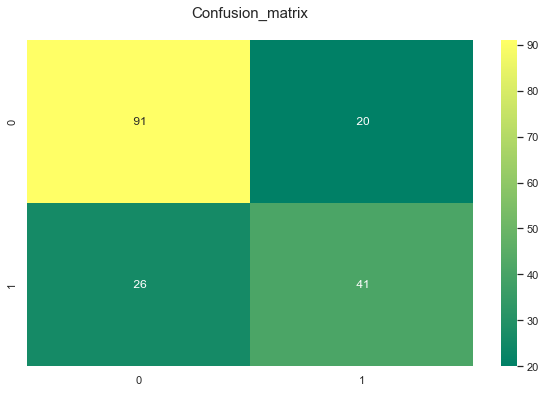

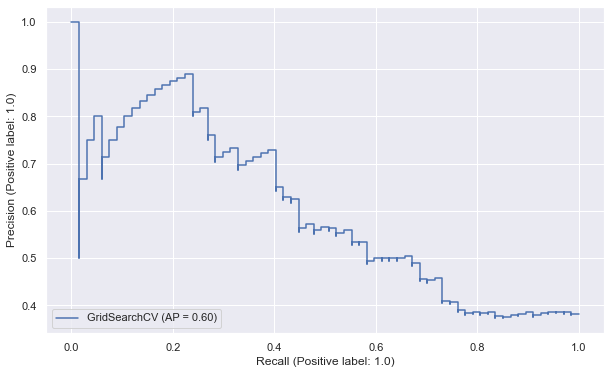

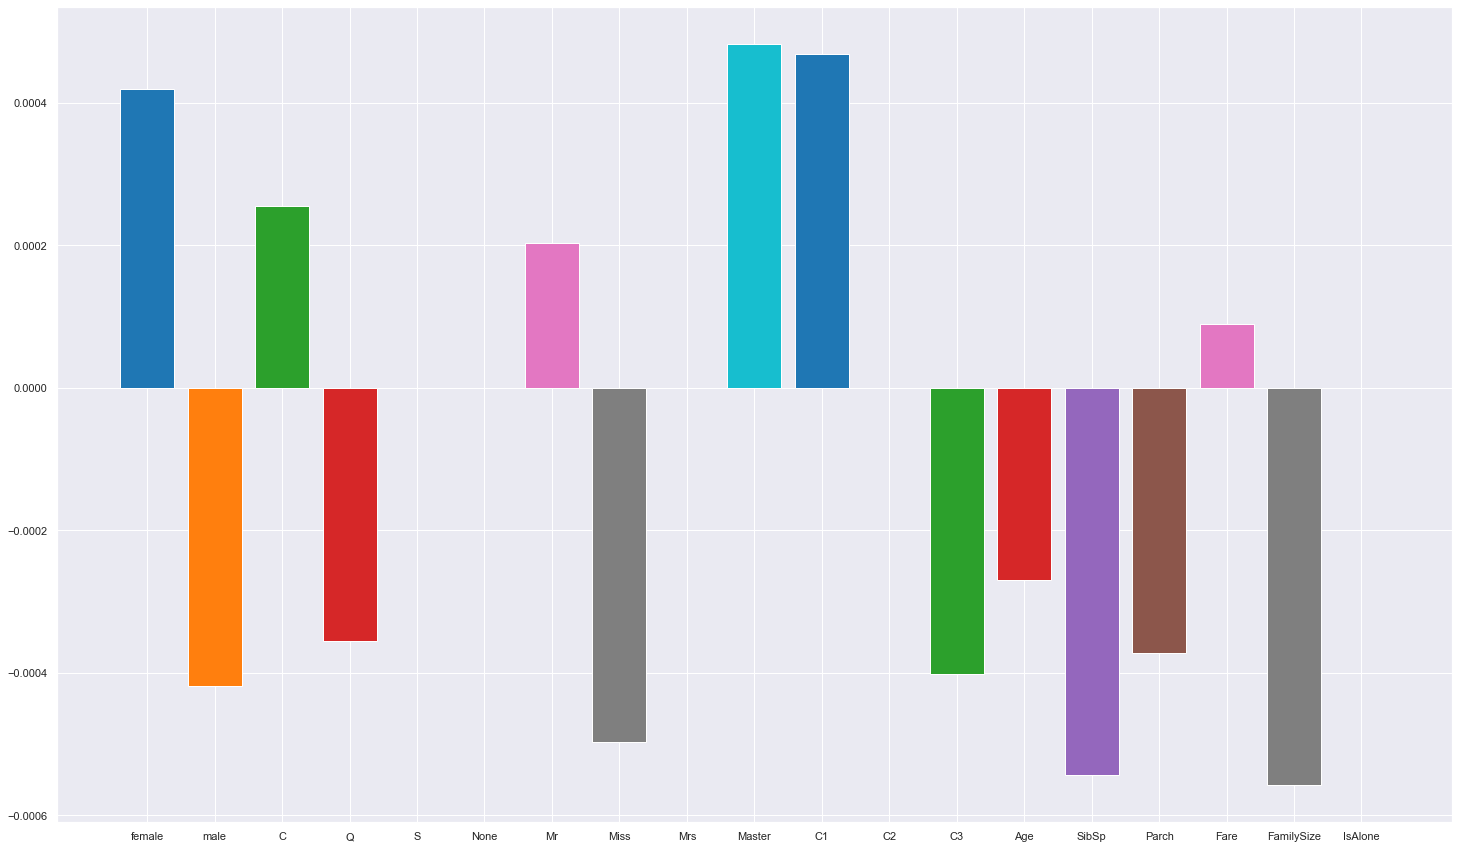

In [47]:
from sklearn.linear_model import Perceptron

print("Perceptron")
start_t=time.time()

percep_param_grid ={'eta0':[0.0001, 0.001, 0.01, 0.1, 1.0], 'max_iter':[1, 10, 100, 1000]}

model = Perceptron()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

Percep = Perceptron()
Percep = GridSearchCV(Percep, percep_param_grid, cv = StratifiedKFold(n_splits = 10),
                      scoring = "accuracy", n_jobs = -1,verbose = 2 )

Percep.fit(X_train,Y_train)
prediction_rm=Percep.predict(X_test)
print(pd.concat([pd.DataFrame(Percep.cv_results_["params"]),pd.DataFrame(Percep.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=Percep.best_score_
print('The cross validated score for Perceptron is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(Percep,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

metrics.PrecisionRecallDisplay.from_estimator(Percep,X_test,Y_test)
f1 = metrics.f1_score(Y_test, Percep.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_P=time.time() - start_t
print("Execution time:",Et_P," seconds")

plot_features(Percep.best_estimator_.coef_[0],train_df.columns.drop("Survived"))

Podem observar que amb el perceptron aplicar una Cross Validation i un `GridSearchCV` s'obté una millora molt substancial. Sense aplicar cap de les dues coses esmentades obtenim una accuracy de menys d'un 50%, mentre que després d'aplicar-ho obtenim una accuracy del 74.7%. Com podem veure s'incrementa l'accuracy més d'un 25%.

Si mirem la matriu de confusió, podem veure com disminueix la quantitat de valors encertats, tant positius com negatius, això encaixa amb l'accuracy que tenim. També si comparem amb la que aconseguim amb la logística veiem que efectivament la classificació és pitjor. Igualment, podem continuar veient una mica el ratio de dos terços de morts i un terç de supervivents als resultats de la classificació.

Si ens fixem en els hiperparàmetres veiem que els millors resultats d'accuracy es donen quan `max_iter` és u sense importar el valor de `eta0`.

Si ens fixem a les features de la classificació, podem observar que dona valors bastant elevats a totes les features. Si ens fixem només 6 estan més o menys a un valor absolut menor de 2.5. Igualment, podem extreure que a les que els hi dona més importància són a `Mrs`, `Mr`, `Master` i `SibSp`.

Si mirem el valor de $F_1$ veiem que aquest es 0.6 el qual no es massa bo, pero tampoc es menor a 0.5. Comparat amb les mètriques obtingudes de la logística podem deduir que la logística es millor classificador per aquest problema que el perceptron.

### SVC (Super vector Classification)

El temps d'ajust s'escala almenys quadràticament amb el nombre de mostres i pot ser poc pràctic més enllà de desenes de milers de mostres.

#### SVC Lineal

Linear SVC Classifier
Accuracy without Grid and crossvalidation:  79.21
Fitting 10 folds for each of 9 candidates, totalling 90 fits
The cross validated score for LinearSVC is: 82.82
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
ROC_AUC:  0.8465779212047869
f1 score is: 0.7911404637333105
Execution time: 1.5232620239257812  seconds


<BarContainer object of 19 artists>

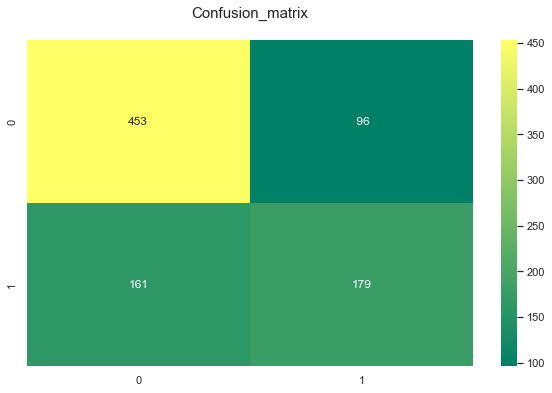

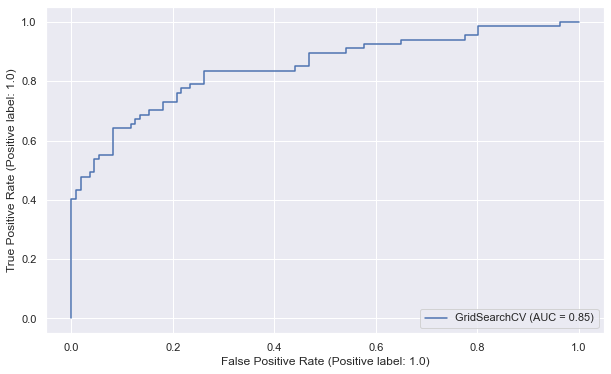

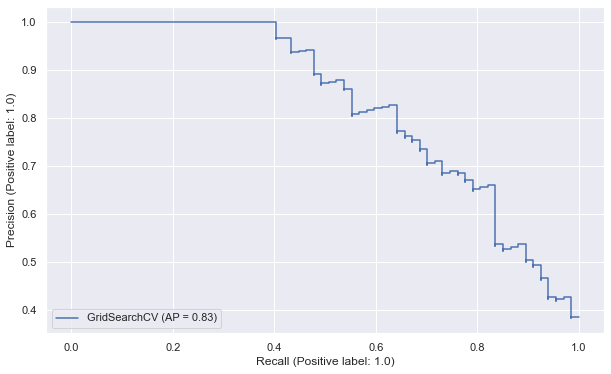

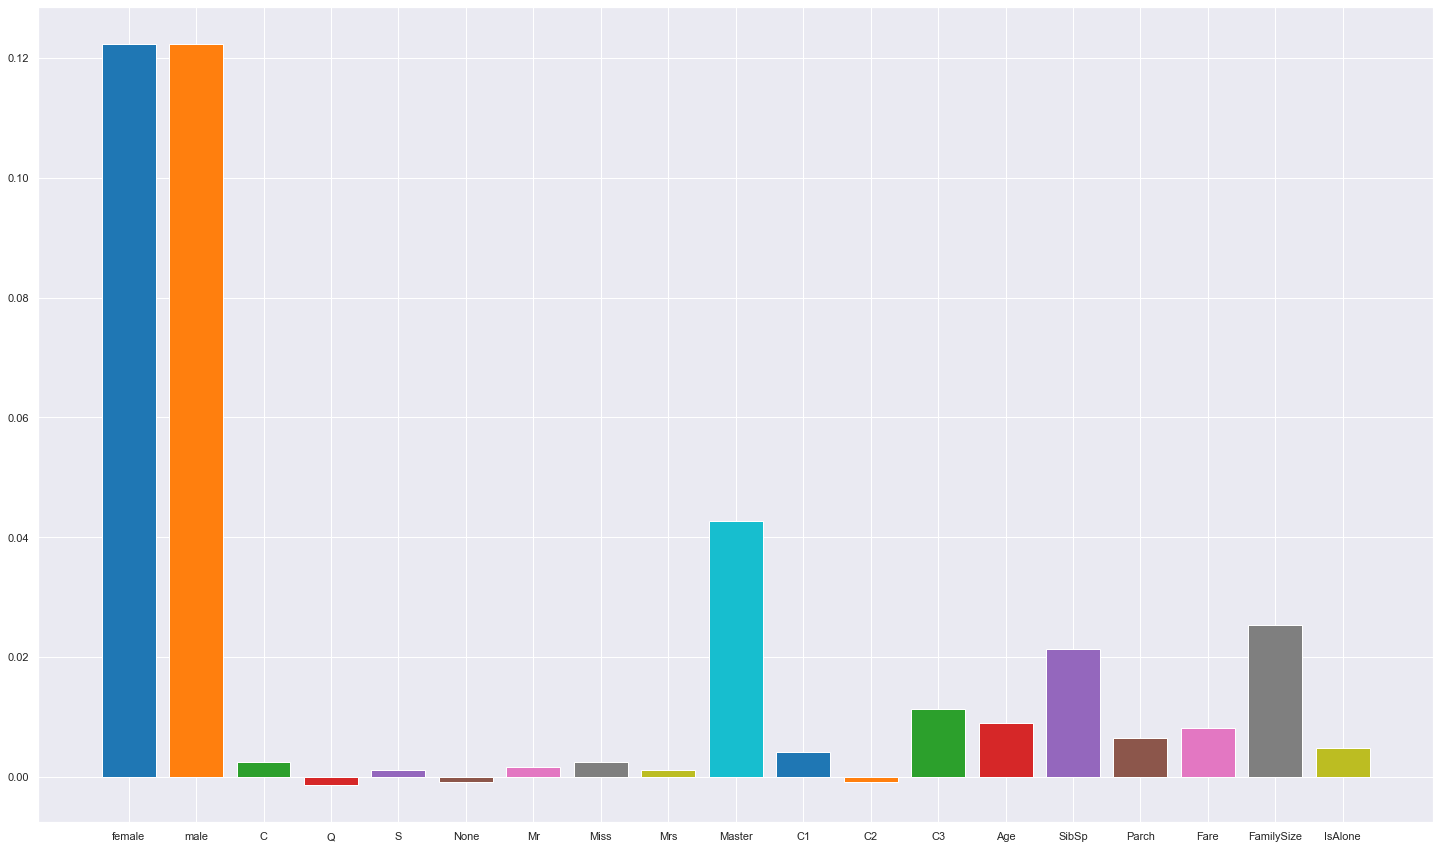

In [48]:
print("Linear SVC Classifier")
start_t=time.time()

parametres = {'max_iter':[1,10,100], 'C':[1,5,10]}

model = LinearSVC()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)
print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

lsvc = LinearSVC()
lsvc = GridSearchCV(lsvc, parametres, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

lsvc.fit(X_train,Y_train)
prediction_rm=lsvc.predict(X_test)
result_rm=lsvc.best_score_
print('The cross validated score for LinearSVC is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(lsvc,all_features,Targeted_feature,cv=10)
sns.heatmap(metrics.confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_score = lsvc.decision_function(X_test)
FPR, TPR, _ = metrics.roc_curve(Y_test, y_score)
ROC_AUC = metrics.auc(FPR, TPR)
print ("ROC_AUC: ", ROC_AUC)
metrics.RocCurveDisplay.from_estimator(lsvc,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(lsvc,X_test,Y_test)
f1 = metrics.f1_score(Y_test, lsvc.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_LSVC=time.time() - start_t
print("Execution time:",Et_LSVC," seconds")
#Pot ser que cada classificador agafi la importancia diferent
results = permutation_importance(lsvc.best_estimator_, X_train, Y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
    
coef_dict = {}
for coef, feat in zip(importance,all_features):
    coef_dict[feat] = coef  

cycol = cycle(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
              'tab:gray','tab:olive','tab:cyan'])
colors=[]
for i in range(0,len(all_features)):
    colors.append(next(cycol))

plt.figure(figsize=(25,15))
plt.bar(coef_dict.keys(),coef_dict.values(),color=colors) 

#### SVC

SVC Classifier
Accuracy without Grid and crossvalidation:  84.27
Fitting 10 folds for each of 6 candidates, totalling 60 fits
The cross validated score for SVC is: 83.11
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
ROC_AUC:  0.8347451929541481
f1 score is: 0.8137198730594392
Execution time: 477.4672975540161  seconds


<BarContainer object of 19 artists>

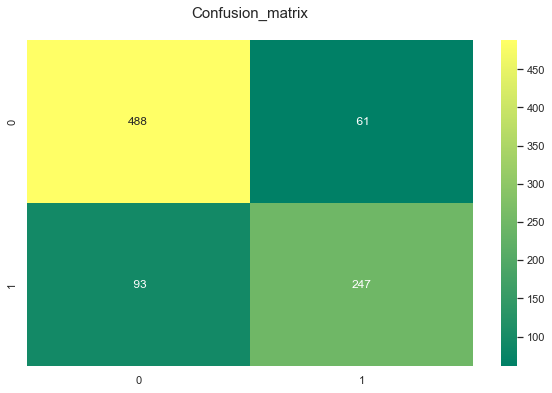

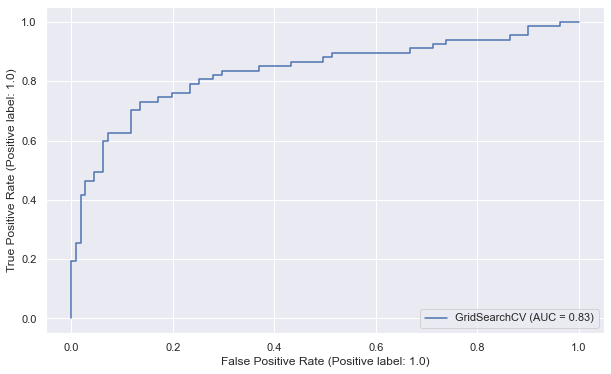

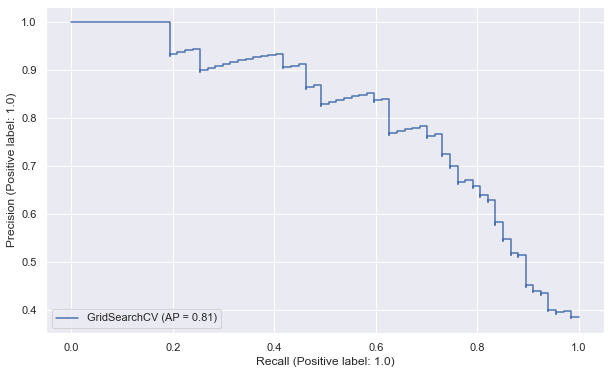

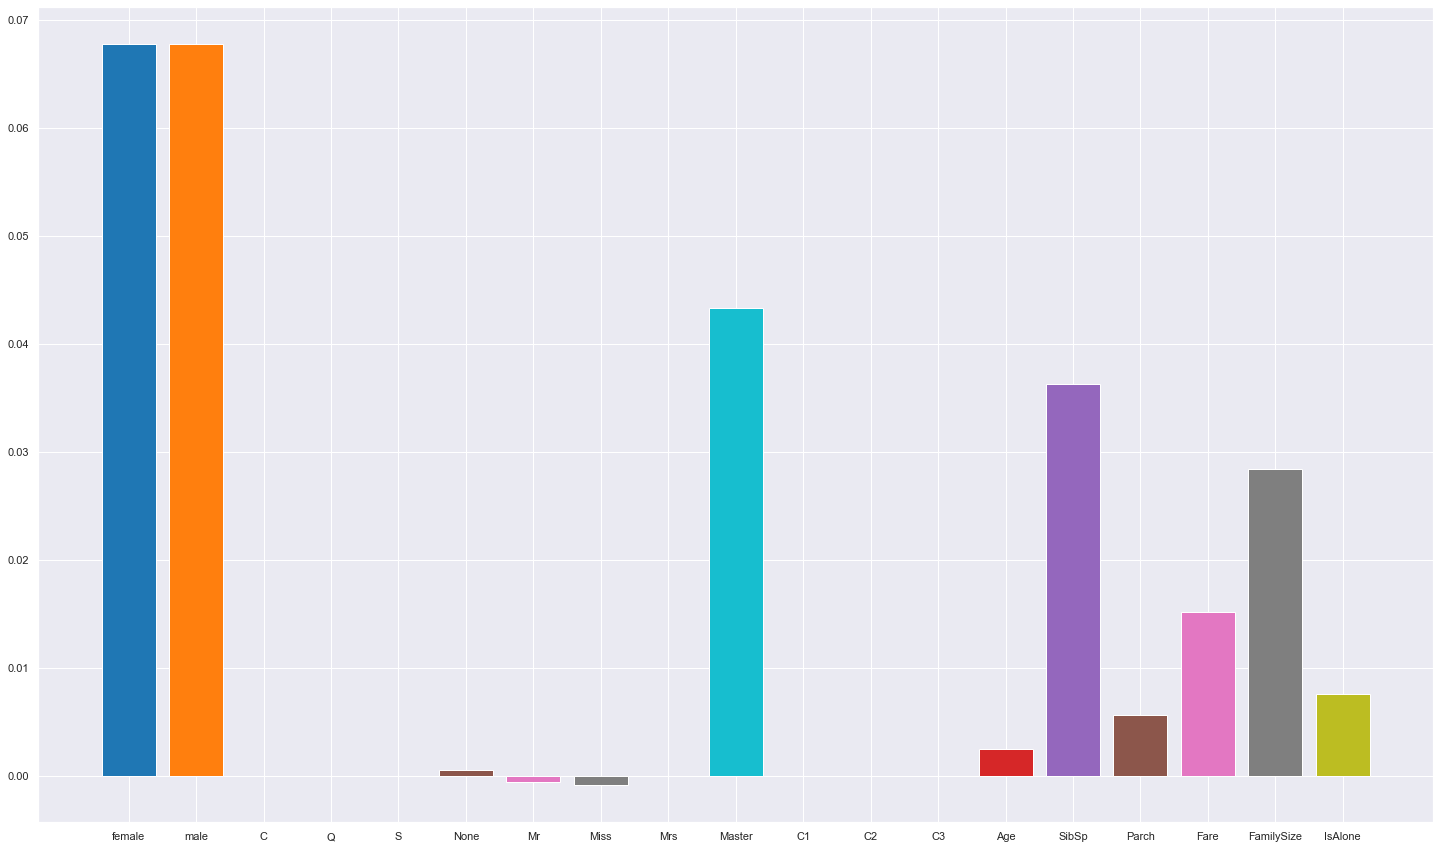

In [49]:
from sklearn.inspection import permutation_importance
import sklearn.svm as svm
print("SVC Classifier")
start_t=time.time()

parametres = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

model = svm.SVC()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)
print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

svc = svm.SVC()
svc = GridSearchCV(svc, parametres, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

svc.fit(X_train,Y_train)
prediction_rm=svc.predict(X_test)
result_rm=svc.best_score_
print('The cross validated score for SVC is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(svc,all_features,Targeted_feature,cv=10)
sns.heatmap(metrics.confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_score = svc.decision_function(X_test)
FPR, TPR, _ = metrics.roc_curve(Y_test, y_score)
ROC_AUC = metrics.auc(FPR, TPR)
print ("ROC_AUC: ", ROC_AUC)
metrics.RocCurveDisplay.from_estimator(svc,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(svc,X_test,Y_test)
f1 = metrics.f1_score(Y_test, svc.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_SVC=time.time() - start_t
print("Execution time:",Et_SVC," seconds")
#Pot ser que cada classificador agafi la importancia diferent
results = permutation_importance(svc.best_estimator_, X_train, Y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
    
coef_dict = {}
for coef, feat in zip(importance,all_features):
    coef_dict[feat] = coef  

cycol = cycle(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
              'tab:gray','tab:olive','tab:cyan'])
colors=[]
for i in range(0,len(all_features)):
    colors.append(next(cycol))

plt.figure(figsize=(25,15))
plt.bar(coef_dict.keys(),coef_dict.values(),color=colors) 

Podem observar que amb el SVC aplicar una Cross Validation i un `GridSearchCV` s'obté un empitjorament de l'acurracy passem d'un 84.27% a un 83.1%. 

Si mirem la matriu de confusió, podem veure com el model ha estimat correctament 509 valors positius i 101 valors negatius. Els valors on el model s'ha equivocat en el cas de positiu/negatiu és bastant elevat, en canvi, el negatiu/positiu és baix, per tant, podem veure com l'acuraccy obtinguda té sentit amb la matriu de confusió.

Si ens fixem a les features de la classificació podem observar que el predictor amb major importància és `Master` amb diferència. Igualment, podem extreure que a les que els hi dona menys importància, ja que tenen valors negatius són a `C`, `S`, `None`, `Mr`, `Miss` i `C1`.

Si mirem el valor de $F_1$, veiem que aquest és 0.81 el qual és considerat com a bo.

El valor ROC també és bo, ja que hem obtingut un valor ROC de 0.83, per tant, tenim que el model predirà amb un 83% d'encert si sobreviu o no.

Podríem considerar el SVC com un model bo per classificar el nostre dataset.

### KNN

El KNN és un mètode de classificació supervisada que serveix per estimar la funció de densitat de les predictores $x$ per cada classe $C_j$. Aquest mètode estima el valor de la funció de denistat de probabilitat o directament la probabilitat a posteriori de que un element $x$ pertanyi a la classe $C_j$ a partir de la informació proporcionada pel conjunt de prototipus. La normalizació de dades pot millorar considerablement la exactitud del algorisme $\displaystyle k$

KNN Classifier
Accuracy without Grid and crossvalidation:  82.02
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
The cross validated score for KNN is: 82.84
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
ROC score is:  0.8760252790103537
f1 score is: 0.8389938176270835
Execution time: 38.07401967048645  seconds


<BarContainer object of 19 artists>

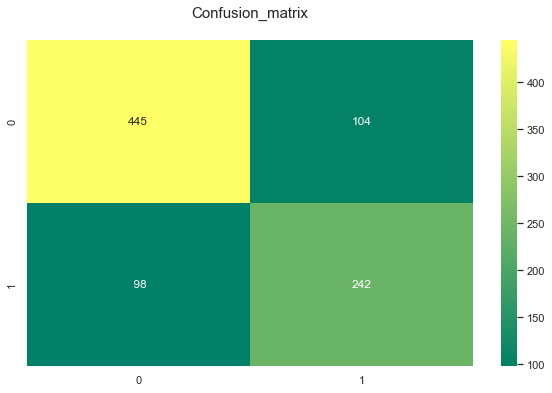

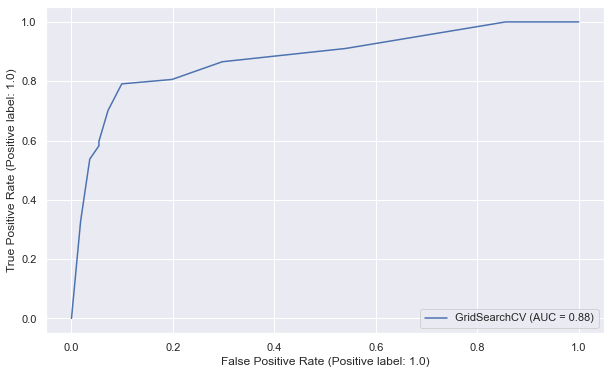

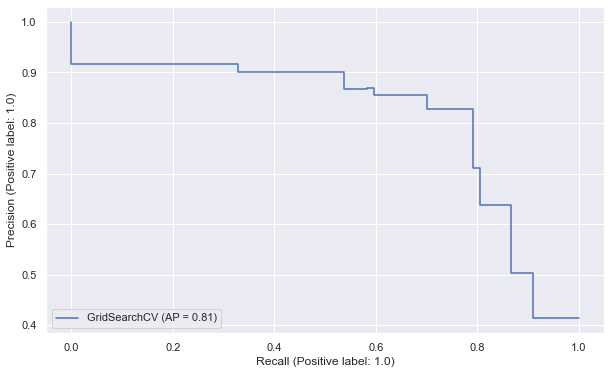

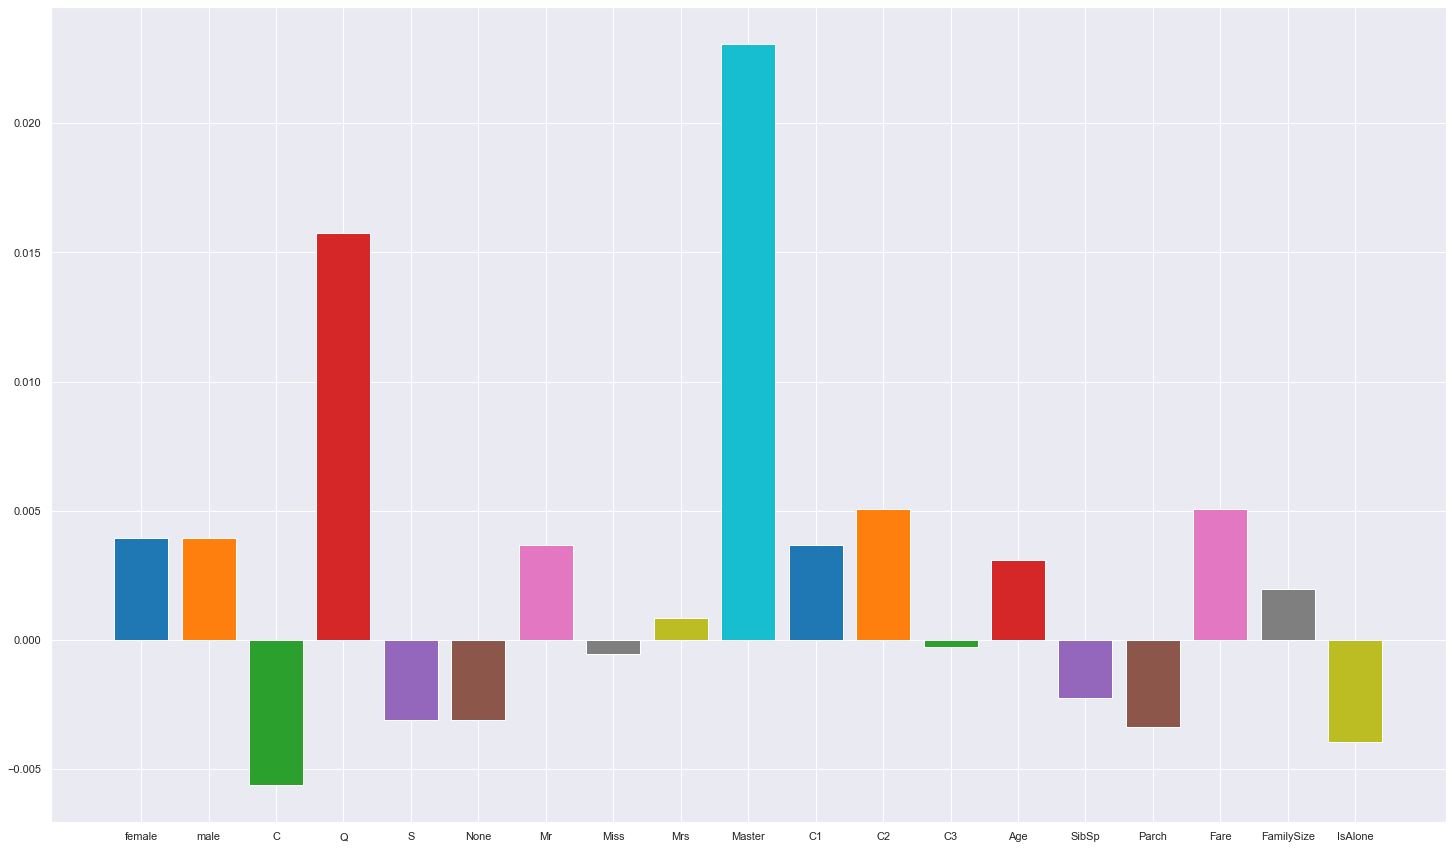

In [50]:
from sklearn.inspection import permutation_importance
print("KNN Classifier")
start_t=time.time()

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)
print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

knn = KNeighborsClassifier()
knn = GridSearchCV(knn, knn_param_grid, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

knn.fit(X_train,Y_train)
prediction_rm=knn.predict(X_test)
result_rm=knn.best_score_
print('The cross validated score for KNN is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(knn,all_features,Targeted_feature,cv=10)
sns.heatmap(metrics.confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = knn.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(knn,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(knn,X_test,Y_test)
f1 = metrics.f1_score(Y_test, knn.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_KNN=time.time() - start_t
print("Execution time:",Et_KNN," seconds")
#Pot ser que cada classificador agafi la importancia diferent
results = permutation_importance(knn.best_estimator_, X_train, Y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
    
coef_dict = {}
for coef, feat in zip(importance,all_features):
    coef_dict[feat] = coef  

cycol = cycle(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
              'tab:gray','tab:olive','tab:cyan'])
colors=[]
for i in range(0,len(all_features)):
    colors.append(next(cycol))

plt.figure(figsize=(25,15))
plt.bar(coef_dict.keys(),coef_dict.values(),color=colors) 

Podem observar que amb el KNN aplicar una Cross Validation i un `GridSearchCV` s'obté una mínima millora d'acurracy, passem d'un 82% a un 82.4%. 

Si mirem la matriu de confusió, podem veure com el model ha estimat correctament 478 valors positius i 164 valors negatius. Els valors on el model s'ha equivocat en el cas de positiu/negatiu és bastant elevat, en canvi, el negatiu/positiu és baix, per tant, podem veure com l'acuraccy obtinguda té sentit amb la matriu de confusió.

Si ens fixem a les features de la classificació, podem observar que dona valors bastant elevats a totes les features. Els predictors amb major importància són: `Master`, `C1`, `C3` i `Age`. Igualment, podem extreure que a les que els hi dona menys importància, ja que tenen valors negatius són a `C`, `S`, `None` i `Mrs`.

Si mirem el valor de $F_1$ veiem que aquest és 0.83 el qual és considerat com a bo.

El valor ROC també és bo, ja que ens indica el valor comprés sota l'àrea de la corba, hauria d'estar compres entre 0.5 i 1 on 1 és un diagnòstic perfecte i 0.5 una prova sense capacitat discriminatòria diagnostica. Hem obtingut un valor ROC de 0.85, per tant, tenim que el model predirà amb un 85% d'encert si sobreviu o no.

Podríem considerar el KNN com un model bo per classificar el nostre dataset.

### Mètodes d'Ensemble

Els mètodes, ensemble són aquells que combinen diferents models base per produir un model òptim.

### Ada boosting amb Regressió Logística 

És un meta-algorisme de classificació que a partir d'aprenentatges dèbils modifica aquests a partir de les prediccions errònies fetes pels anteriors classificadors dèbils. Li posarem d'estimador base la regressió logística, ja que aquesta és ràpida i dona bons resultats.

AdaBoostClassifier
Accuracy without Grid and crossvalidation:  77.53
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
                            base_estimator  learning_rate  n_estimators  \
0   LogisticRegression(solver='newton-cg')            0.5            25   
1   LogisticRegression(solver='newton-cg')            0.5            50   
2   LogisticRegression(solver='newton-cg')            0.5           100   
3   LogisticRegression(solver='newton-cg')            0.5           200   
4   LogisticRegression(solver='newton-cg')            1.0            25   
..                                     ...            ...           ...   
95       LogisticRegression(solver='saga')            2.0           200   
96       LogisticRegression(solver='saga')            3.0            25   
97       LogisticRegression(solver='saga')            3.0            50   
98       LogisticRegression(solver='saga')            3.0           100   
99       LogisticRegression(solver='saga'

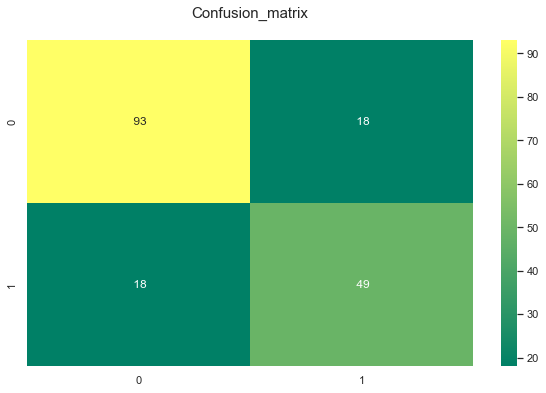

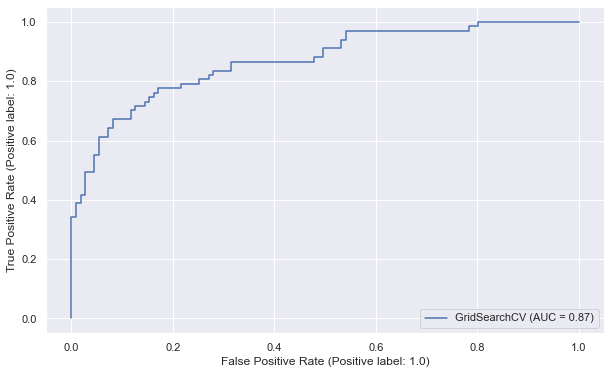

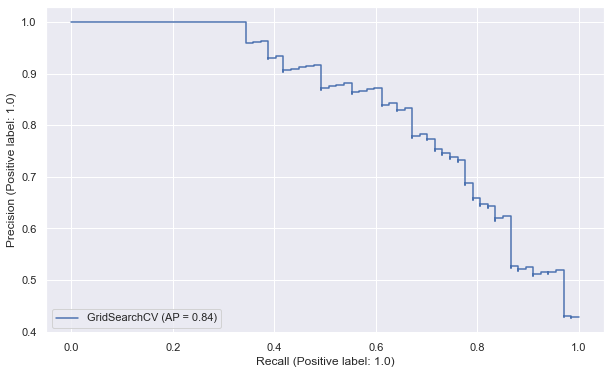

In [51]:
print("AdaBoostClassifier")
start_t=time.time()

#El fem amb una regressió logistica per millorar els resultats

Ada_param_grid = {'base_estimator':[LogisticRegression(solver='newton-cg'),LogisticRegression(solver='lbfgs'),
                                    LogisticRegression(solver='liblinear'),LogisticRegression(solver='sag'),
                                    LogisticRegression(solver='saga')],
                  'n_estimators':[25,50,100,200], 'learning_rate':[0.5,1,1.5,2,3]}

model = AdaBoostClassifier()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

ABC = AdaBoostClassifier(base_estimator=LogisticRegression())
ABC = GridSearchCV(ABC, Ada_param_grid, cv =  StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

ABC.fit(X_train,Y_train)
prediction_rm=ABC.predict(X_test)
print(pd.concat([pd.DataFrame(ABC.cv_results_["params"]),pd.DataFrame(ABC.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=ABC.best_score_
print('The best hyperparameters are:\nbase_estimator=',
      ABC.best_params_['base_estimator'],'\nn_estimators=',
      ABC.best_params_['n_estimators'],
      '\nlearning_rate',ABC.best_params_['learning_rate'])
print('The cross validated score for AdaBoostClassifier is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(ABC,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = ABC.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(ABC,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(ABC,X_test,Y_test)
f1 = metrics.f1_score(Y_test, ABC.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_ADB=time.time() - start_t
print("Execution time:",Et_ADB," seconds")

La comparació directa és amb la regressió logística, ja que en aquest cas estem fent servir l'adaboost amb la logística, com podem veure que els resultats de la corba ROC i de la Precision-Recall són molt similars. El canvi no és massa gran, tot i això, sí que podem veure que l'accuracy augmenta una mica respecte a la logística normal.

Sí que s'ha de comentar que en aquest cas podem veure que el solver que dona millors resultats és el `saga` aquest no és el mateix que el que ens dona la logística per si sola, el `GridSearchCV` ens deia que el millor era el `liblinear`.
També s'ha de comentar que el temps d'executar aquest codi augmenta molt comparat amb la logística simple i el `GridSearchCV`, això es causa que la cerca d'hiperparametres que estem fent és molt més gran que la de la logística simple.

### Random Forest Classifier

El random Forest és un mètode, ensemble que combina regressió, classificadors i altres tasques per construir molts arbres de decisió.

Per les tasques de classificació la sortida del bosc aleatòria és la classe seleccionada per la majoria dels arbres.
Per les tasques de regressió retorna la predicció mitjana o promig dels arbres individuals.

Random Forest Classifier
Accuracy without Grid and crossvalidation:  82.58
Fitting 10 folds for each of 54 candidates, totalling 540 fits
The cross validated score for Random Forest Classifier is: 83.67
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
ROC score is:  0.8617722199811753
f1 score is: 0.8190498772382039
Execution time: 229.91280913352966  seconds


<BarContainer object of 19 artists>

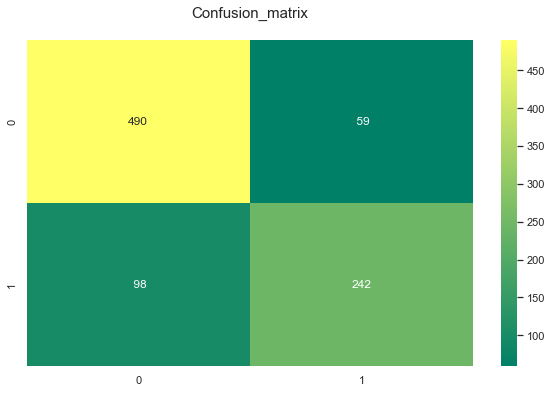

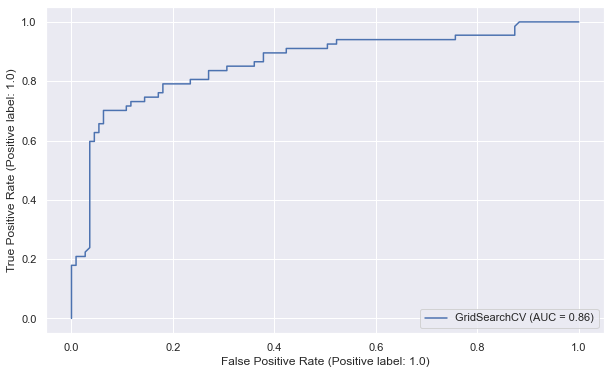

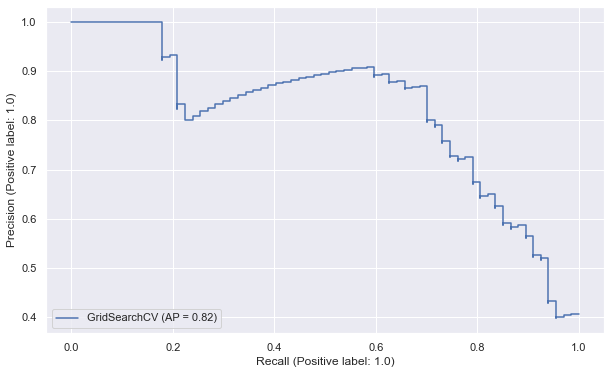

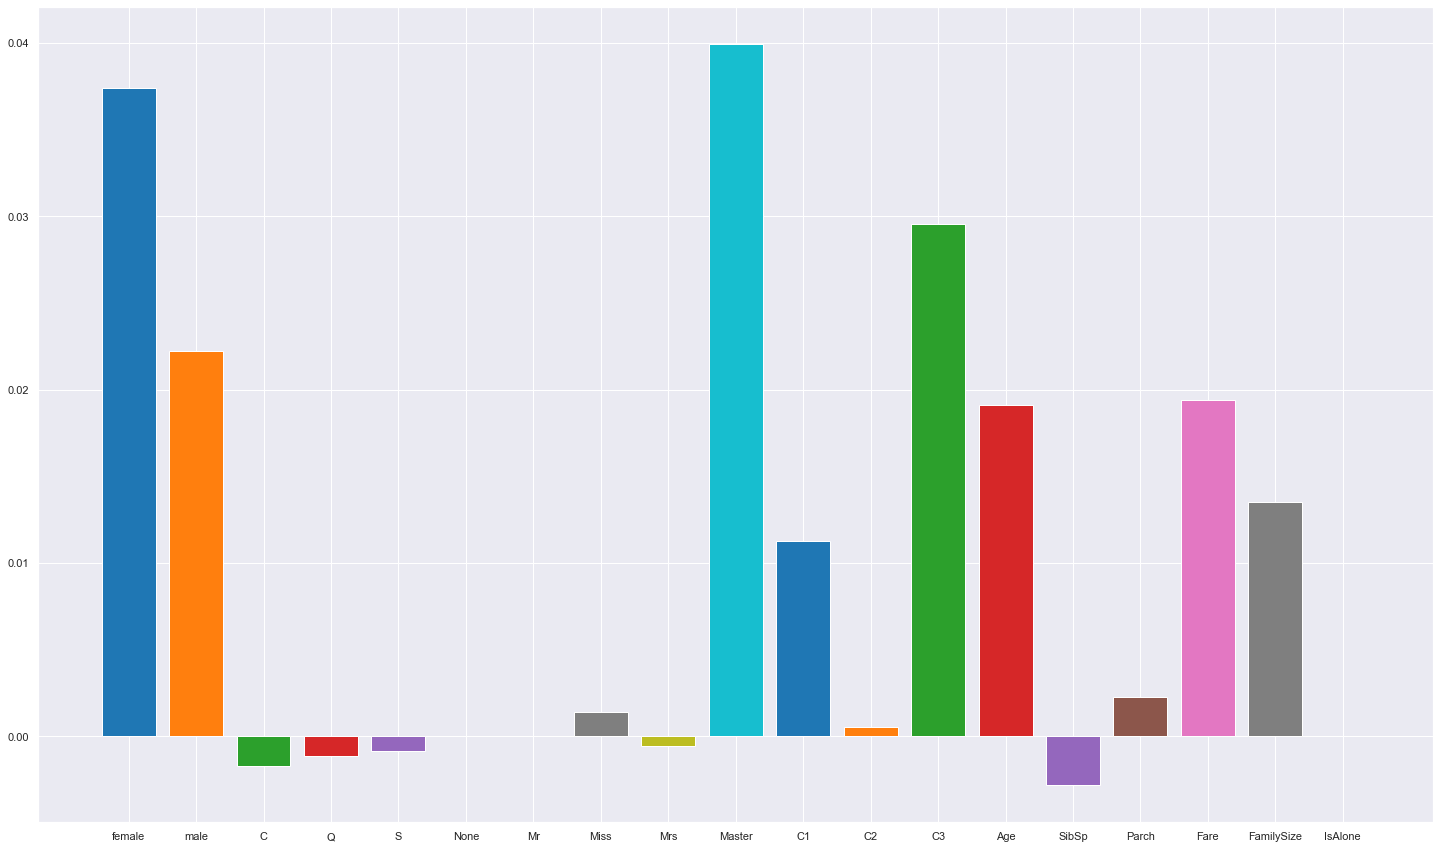

In [52]:
from sklearn.inspection import permutation_importance
print("Random Forest Classifier")
start_t=time.time()

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}


model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)
print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

rf = RandomForestClassifier()
rf = GridSearchCV(rf, rf_param_grid, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

rf.fit(X_train,Y_train)
prediction_rm=rf.predict(X_test)
result_rm=rf.best_score_
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(rf,all_features,Targeted_feature,cv=10)
sns.heatmap(metrics.confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = rf.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(rf,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(rf,X_test,Y_test)
f1 = metrics.f1_score(Y_test, rf.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_RFC=time.time() - start_t
print("Execution time:",Et_RFC," seconds")

#Pot ser que cada classificador agafi la importancia diferent
results = permutation_importance(rf, X_train, Y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
    
coef_dict = {}
for coef, feat in zip(importance,all_features):
    coef_dict[feat] = coef  

cycol = cycle(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
              'tab:gray','tab:olive','tab:cyan'])
colors=[]
for i in range(0,len(all_features)):
    colors.append(next(cycol))

plt.figure(figsize=(25,15))
plt.bar(coef_dict.keys(),coef_dict.values(),color=colors) 

Podem observar que amb el Random Forest aplicar una Cross Validation i un `GridSearchCV` s'obté una petita millora. Sense aplicar cap de les dues coses esmentades aconseguim una accuracy d'un 82%, mentre que després d'aplicar-ho obtenim una accuracy del 83.68%.

Si mirem la matriu de confusió, podem veure com el model ha estimat correctament 493 valors positius i 247 valors negatius. Els valors on el model s'ha equivocat ronden els 60, per tant, podem veure com la acuraccy obtinguda té sentit amb la matriu de confusió.

Si ens fixem a les features de la classificació, podem veure que dona valors bastant elevats a totes les features. Els predictors amb major importància són: `Fare`, `C1`, `C3` i `Age`. Igualment, podem extreure que a les que els hi dona menys importància són a `Mrs`, `None`, `Master` i `Q`.

Si mirem el valor de $F_1$ veiem que aquest és 0.82 el qual és considerat com a bo. Podríem considerar el Random Forest com un model bo per classificar el nostre dataset.

### Gradient Boosting

És una tècnica d'aprenentatge automàtic utilitzat per la regressió i per problemes de classificació estadística el qual produeix un model predictiu en forma d'un conjunt de models de prediccions dèbils normalment arbres de decisió.

Gradient Boosting
Accuracy without Grid and crossvalidation:  82.02
Fitting 10 folds for each of 27 candidates, totalling 270 fits
The cross validated score for Gradient Boosting Classifier is: 83.96
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
ROC score is:  0.8594863520236654
f1 score is: 0.8410796126552337
Execution time: 39.1747944355011  seconds


<BarContainer object of 19 artists>

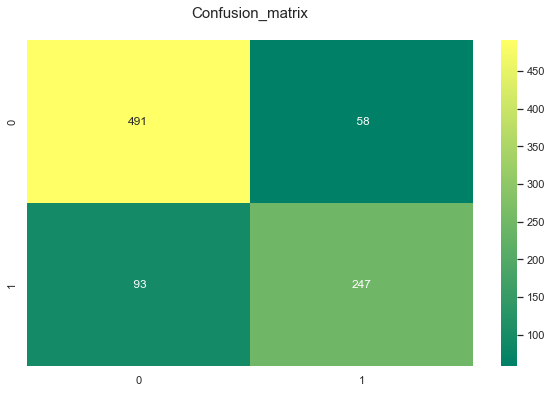

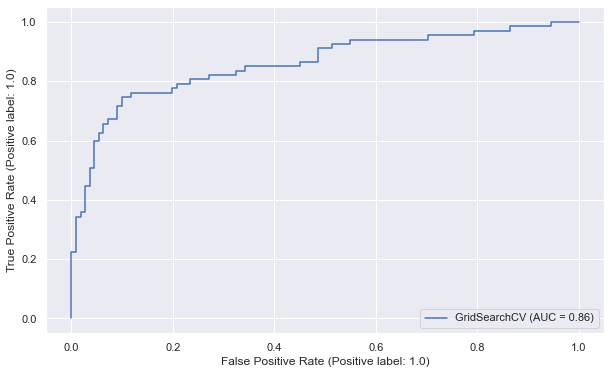

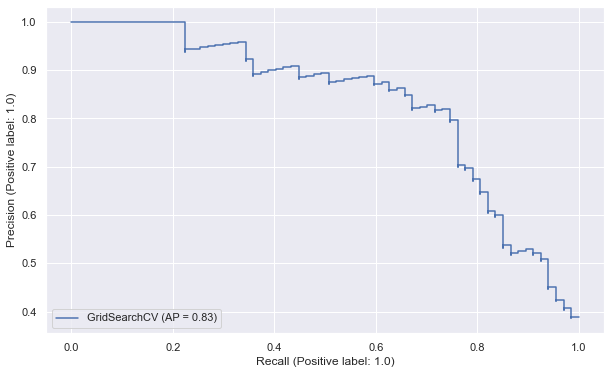

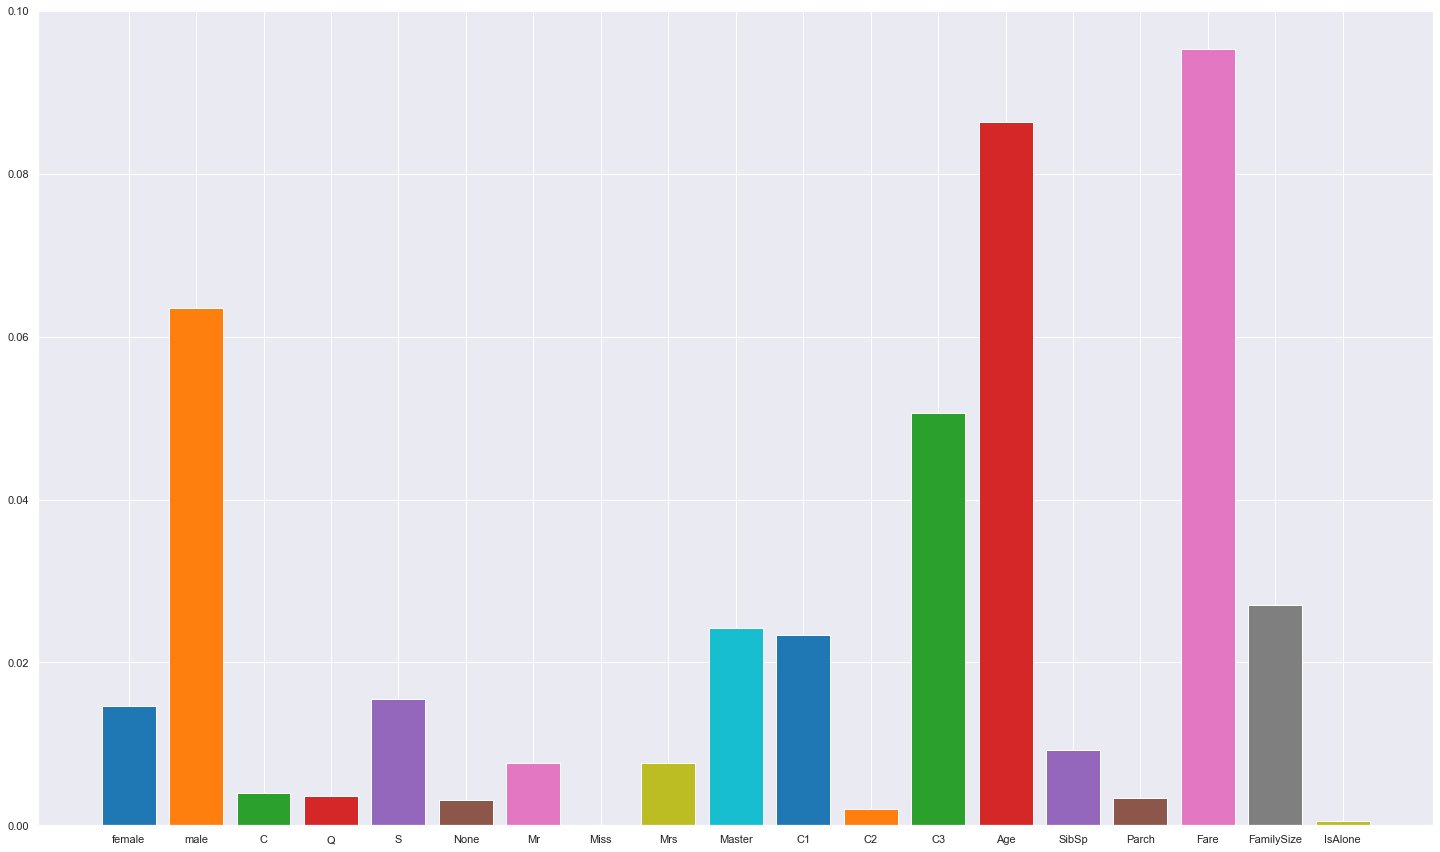

In [53]:
print("Gradient Boosting")
start_t=time.time()

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }

model = GradientBoostingClassifier()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)
print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

gbc = GradientBoostingClassifier()
gbc = GridSearchCV(gbc, gbc_param_grid, cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2 )

gbc.fit(X_train,Y_train)
prediction_rm=gbc.predict(X_test)
result_rm=gbc.best_score_
print('The cross validated score for Gradient Boosting Classifier is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(gbc,all_features,Targeted_feature,cv=10)
sns.heatmap(metrics.confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = gbc.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(gbc,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(gbc,X_test,Y_test)
f1 = metrics.f1_score(Y_test, gbc.predict(X_test), average='weighted')
print("f1 score is:", f1)
Et_GB=time.time() - start_t
print("Execution time:",Et_GB," seconds")
#Pot ser que cada classificador agafi la importancia diferent
results = permutation_importance(gbc, X_train, Y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
    
coef_dict = {}
for coef, feat in zip(importance,all_features):
    coef_dict[feat] = coef  

cycol = cycle(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink',
              'tab:gray','tab:olive','tab:cyan'])
colors=[]
for i in range(0,len(all_features)):
    colors.append(next(cycol))

plt.figure(figsize=(25,15))
plt.bar(coef_dict.keys(),coef_dict.values(),color=colors) 

Podem observar que amb el Random Forest aplicar una Cross Validation i un `GridSearchCV` s'obté una petita millora. Sense aplicar cap de les dues coses esmentades assolim una accuracy d'un 82%, mentre que després d'aplicar-ho obtenim una accuracy del 83.8%. 

Si mirem la matriu de confusió, podem veure com el model ha estimat correctament 495 valors positius i 246 valors negatius. Els valors on el model s'ha equivocat són inferiors als altres dos, per tant, podem veure com la acuraccy obtinguda té sentit amb la matriu de confusió.

Si ens fixem a les features de la classificació podem observar que dona valors bastant elevats a totes les features. Els predictors amb major importància són: `Fare` , `Female`, `C3` i `Age`. Igualment podem extreure que a les que els hi dona menys importància son a `C`, `Q`, `Parch` i `SibSp` amb valor negatiu.

Si mirem el valor de, $F_1$ veiem que aquest és 0.82 el qual és considerat com a bo. 
I el valor de ROC del 0.85. 
Podríem considerar el GradientBoosting com un model bo per classificar el nostre dataset.

### Temps de les classificacions

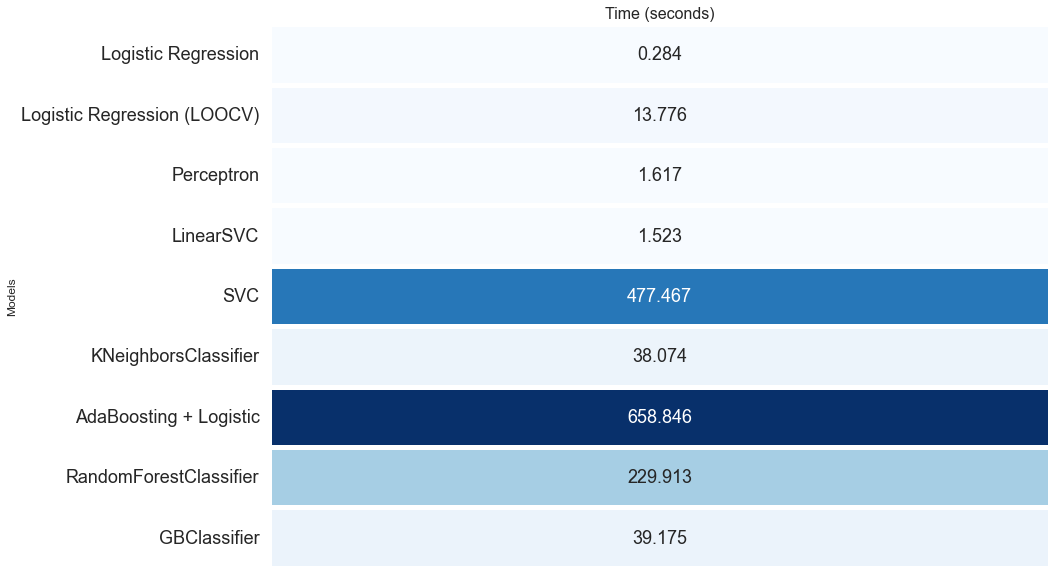

In [54]:
sns.set_style("darkgrid")
times=[Et_L, Et_LL, Et_P, Et_LSVC, Et_SVC, Et_KNN, Et_ADB, Et_RFC, Et_GB]
cv_results = pd.DataFrame({"":times,
                           "Models":["Logistic Regression", 
                                     "Logistic Regression (LOOCV)",
                                     "Perceptron",
                                     "LinearSVC",
                                     "SVC",
                                     "KNeighborsClassifier",
                                     "AdaBoosting + Logistic",
                                     "RandomForestClassifier",
                                     "GBClassifier"]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Time (seconds)", size = 16)
plt.show()

Podem veure que el més lent de tots es l'AdaBoosting amb la logística, això es en gran part per la busqueda intensiva d'hiperparàmetres que estem fent. Després segueixen el SVC i el Random Forest. I finalment tenim que les mes ràpides son el perceptron i la regressió logística.

## Preguntes a respondre

* Separa la base de dades en el conjunt de train-test. Com de fiables seran els resultats obtinguts? En quins casos serà més fiable, si tenim moltes dades d'entrenament o poques?

Separarem el datset en train i test (normalment agafarem 80% train i 20% test), per evitar un underfitting o overfitting de les dades. Per comprovar si les particions són bones es pot calcular el MSE de les dues particions i cal comprovar que el train no és millor que el test, ja que si no voldria dir que el model s'ha acostumat a les dades de train i s'ha entrenat malament.

* A teoria, hem vist el resultat d'aplicar el 'accuracy_score' sobre dades no balancejades. Podríeu explicar i justificar quina de les següents mètriques serà la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`.

Les tres mètriques surten de la matriu de confusió. L'accuracy s'ha de fer servir quan les classes de variables de sortida estan quasi equilibrats. L'score de precisió ens proporciona informació sobre el rendiment respecte als falsos positius.
L'f1 score és la combinació del recall i la precisió, la qual realitza una mitjana harmònica la que permet que si un dels coeficients és petit i l'altre gran, el resultat tendirà més cap al petit.

En el nostre problema, el més adient podríem considerar que és el F1 score, ja que valorarem el nombre total de positius donats respecte del total de positius verdaders, i avaluarem a la vegada els positius predits a partir dels valors actuals.
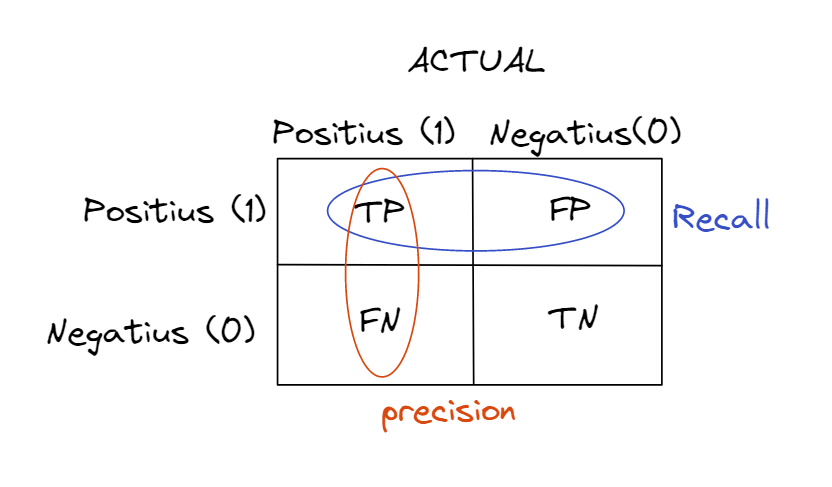


* Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferència entre una i altre.

La mètrica ROC és l'àrea sota la corba on x és False Positive rate (FP) i la y és el True Positive rate (TP).

En canvi, la PR és l'àrea de sota la corba on $x$ és el `Recall` i $y$ la `Precision`.

Són corbes bastant diferents, com podem veure a continuació on evaluem la logística amb les dues gràfiques:



Logistic Regression


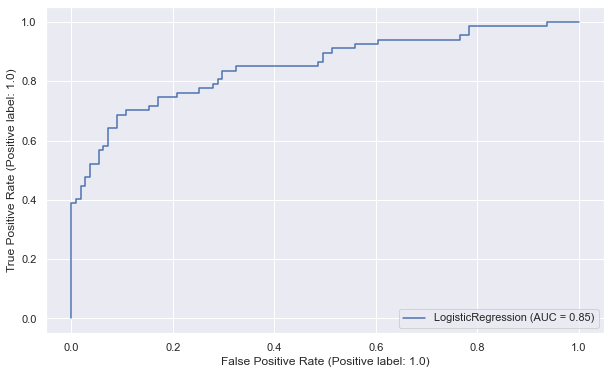

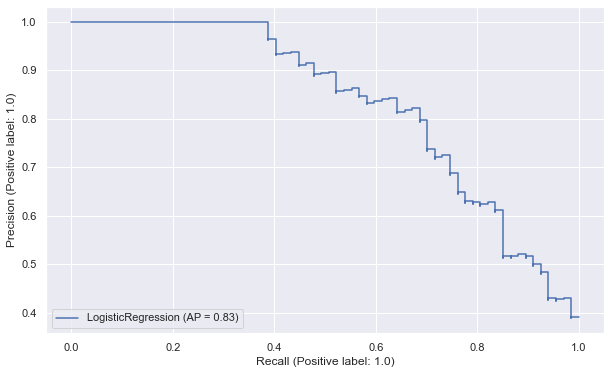

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_state)
Y_test = Y_test.reshape(-1,1)

print("Logistic Regression")
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)
logROC = metrics.RocCurveDisplay.from_estimator(model,X_test,Y_test)
print(logROC)
logPres = metrics.PrecisionRecallDisplay.from_estimator(model,X_test,Y_test)
print(logPres)

Podem veure com la corba ROC ens dona un resultat més alt i la Precision una mica més petita.

Haurem de triar la corba segons el nombre de FP, ja que són els que modifiquen els resultats, i es on la corba és veu més efectada. Per tant, triarem la corba segons el valor de FP.

* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?


In [56]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       111
         1.0       0.73      0.70      0.72        67

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



Considerant que aquest classification report ha estat fet amb un model el qual no s'han buscat els hiperparàmetres bons ni s'ha aplicat un crossvalidation. Tot i això considerem que els valors que s'han de mirar d'augmentar són els de la f1 score, s'aconseguirà augmentant els de la precision i recall indirectament. Per tant, el nostre objectiu és que la prescision i recall siguin alts, per assegurar-nos un model amb resultats bons i acurats.

Preguntes Hyperparameter Search

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant?

L'opció que hem trobat nosaltres ha sigut aplicar un `GridSearchCV` per trobar el millor paràmetre tenint en compte totes les combinacions de paràmetres que existien. Això, ens porta a dir que el `GridSearchCV` és més costos, computacionalment parlant, que per exemple `RandomizedSearchCV`, un altre mètode de busca de paràmetres, ja que el primer ha de mirar totes les combinacions possibles i, en canvi, el segon agafa una quantitat específica de candidats d'un espai de paràmetres amb una distribució específica.

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels dos métodes creieu que obtindrà millor resultat final?

Agafaríem el RandomForest i AdaBoost+Logistic, ja que són els que ens han donat millors resultats i les que podrien, llavors donar millor resultat amb tan sols 1 hora de PC.

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

Sí, si mirem a la pàgina a la qual ens envia el link podem trobar una altra manera de buscar hiperparàmetres. En aquest cas tenim el `BayesSearchCV`, que consisteix en fer un model de probabilitats de la funció que volem optimitzar i seleccionar els hiperparàmetres que millors resultats sembla que donin per després probar-los a la funció real.

Normalment fer aquesta busqueda clàssica d'hiperparàmetres i optimitzar la busqueda es molt costós per tot el procediment que s'ha de realitzar cada cop que s'inicia l'optimització. Llavors resulta que podem fer un random i un grid search, però aquests no tenen memòria d'anteriors execucions que haguem realitzat, mes enllà de la nostra propia memòria com a humans que serem qui canviarem els hiperparàmetres que s'han de mirar o els intervals d'aquests.

Aquí doncs entra la busqueda bayessiana, es podria dir que aquesta busqueda sí que te memòria, ja que guarden informació de cada iteració que realitzen, cada iteració triga més pero a canvi obtenim una millor busqueda i aquesta és informada. I tenim que el que s'ha comentat anteriorment es menys costós computacionalment que fer un grid search o un random search. Així doncs amb aquesta busqueda informada troba els hiperparàmetres que poden donmar millors resultats en menys temps.

## Apartat A

L'objectiu d'aquest apartat és aprendre a comparar el rendiment obtingut amb els diferents models, utilitzant les mètriques adequades: MSE, accuracy, ROC, $F_1$ score ...


In [57]:
x_train = StandardScaler().fit_transform(train_df.drop(columns=['Survived']))
y_train = train_df['Survived'].values
print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (889, 19)
y_train shape: (889,)


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_state)

In [59]:
kfold = StratifiedKFold(n_splits=10)

In [60]:
random_state = 2
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             GradientBoostingClassifier(random_state = random_state),
             ]

In [61]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gbc_param_grid]

In [62]:
cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for i in range(len(classifier)):
    print("-------------------------------"
          ,"--------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,Y_train)
    cv_result.append(clf.best_score_)
    
    MSE = metrics.mean_squared_error(Y_test,clf.predict(X_test))
    mean_squared_errors.append(MSE)
  
    if (i == 1):
        y_score = clf.decision_function(X_test)
        FPR, TPR, _ = metrics.roc_curve(Y_test, y_score)
        ROC = metrics.auc(FPR, TPR)
    else: 
        y_pred_proba = clf.predict_proba(X_test)
        ROC = metrics.roc_auc_score(Y_test, y_pred_proba[:,1])
    
    roc_auc_scores.append(ROC)
    
    RECALL = metrics.recall_score(Y_test, clf.predict(X_test), average='weighted')
    recall_scores.append(RECALL)
    
    PRECISION = metrics.precision_score(Y_test, clf.predict(X_test), average='weighted')
    precision_scores.append(PRECISION)
    
    F1 = metrics.f1_score(Y_test, clf.predict(X_test), average='weighted')
    f1_scores.append(F1)
  
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("------------------------------"
      ,"---------------------------------------------")

------------------------------- --------------------------------------------
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Model: DecisionTreeClassifier(random_state=2)
Accuracy: %81.56
MSE: 0.16292134831460675
ROC AUC: 0.8698399892429742
Recall: 0.8370786516853933
Precision: 0.8360206608515672
F1-Score: 0.8362992823855677
Best Estimator: DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=2)
------------------------------- --------------------------------------------
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Model: SVC(probability=True, random_state=2)
Accuracy: %83.81
MSE: 0.16853932584269662
ROC AUC: 0.8336694903859082
Recall: 0.8314606741573034
Precision: 0.830145547878816
F1-Score: 0.8303592599108162
Best Estimator: SVC(C=200, gamma=0.001, probability=True, random_state=2)
------------------------------- --------------------------------------------
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Model: Rando

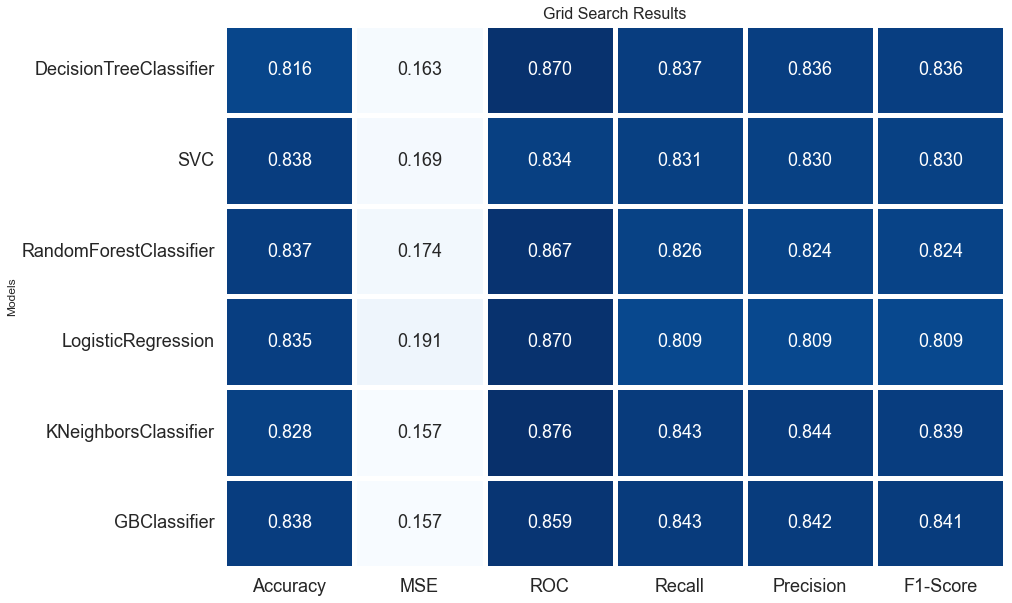

In [63]:
sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "ROC": roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":["DecisionTreeClassifier", 
                                     "SVC",
                                     "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "GBClassifier",
                                     
                                     ]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 16)
plt.show()

In [64]:
particions = [0.5, 0.7, 0.8]
def apply_models(particions,X,y,ret=False):

    for part in particions:
        x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)

        #Creem el regresor logistic
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

        # l'entrenem
        logireg.fit(x_t, y_t)
        problr = logireg.predict_proba(x_v)
        print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))

        #Creem el svm
        svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

        # l'entrenem 
        svc.fit(x_t, y_t)
        probsvc = svc.predict_proba(x_v)
        print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))

        #Creem el svm lineal
        svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

        # l'entrenem 
        svcl.fit(x_t, y_t)
        probsvcl = svcl.predict_proba(x_v)
        print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))

        

        #Creem el svm sigmoid
        svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

        # l'entrenem 
        svcs.fit(x_t, y_t)
        probsvcs = svcs.predict_proba(x_v)
        print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))

        #####

        #random forests gini

        clf = RandomForestClassifier(max_depth=2, random_state=0)
        clf.fit(x_t, y_t)
        probclf = clf.predict_proba(x_v)
        print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))

        #random forests entropy with n_e=1000 and md=5

        clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
        clfe.fit(x_t, y_t)
        probclfe = clfe.predict_proba(x_v)
        print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

        #####

        #KNN ball_tree

        KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
        KNNbt.fit(x_t, y_t)
        probKNNbt = KNNbt.predict_proba(x_v)
        print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))

        #KNN kd_tree

        KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
        KNNkd.fit(x_t, y_t)
        probKNNkd = KNNkd.predict_proba(x_v)
        print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))

        #KNN brute

        KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
        KNNbrt.fit(x_t, y_t)
        probKNNbrt = KNNbrt.predict_proba(x_v)
        print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))

        #####

        #KNN ball_tree weights = distance

        KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
        KNNbtwd.fit(x_t, y_t)
        probKNNbtwd = KNNbtwd.predict_proba(x_v)
        print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))

        #KNN kd_tree weights = distance

        KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
        KNNkdwd.fit(x_t, y_t)
        probKNNkdwd = KNNkdwd.predict_proba(x_v)
        print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))

        #KNN brute weights = distance

        KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
        KNNbrtwd.fit(x_t, y_t)
        probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
        print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))   
        
        
        #Gradient Boosting
        GradBoost = GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=3, random_state=2)
        GradBoost.fit(x_t,y_t)
        probGB = GradBoost.predict_proba(x_v)
        print ("Correct classification Gradient Boosting wd=d    ", part, "% of the data: ", GradBoost.score(x_v, y_v))  

        print("\n")
    if ret:
        return [problr,probsvc,probsvcl,probsvcs,probclf,probclfe,probKNNbt,probKNNkd,probKNNbrt,probKNNbtwd,probKNNkdwd,probKNNbrtwd, probGB],x_t, x_v, y_t, y_v

In [65]:
particions = [0.5, 0.7, 0.8]
probs_list,x_t, x_v, y_t, y_v=apply_models(particions,x_train,y_train,ret=True)

Correct classification Logistic         0.5 % of the data:  0.8112359550561797
Correct classification SVM              0.5 % of the data:  0.7797752808988764
Correct classification SVML             0.5 % of the data:  0.8067415730337079
Correct classification SVMS             0.5 % of the data:  0.6719101123595506
Correct classification RFC              0.5 % of the data:  0.7617977528089888
Correct classification RFC etpy         0.5 % of the data:  0.8089887640449438
Correct classification KNN BT           0.5 % of the data:  0.8067415730337079
Correct classification KNN KD           0.5 % of the data:  0.8089887640449438
Correct classification KNN BRT          0.5 % of the data:  0.8067415730337079
Correct classification KNN BT wd=d      0.5 % of the data:  0.7842696629213484
Correct classification KNN KD wd=d      0.5 % of the data:  0.7865168539325843
Correct classification KNN BRT wd=d     0.5 % of the data:  0.7842696629213484
Correct classification Gradient Boosting wd=d     0.

Els millors estimadors de cada classificador segons els `GridSearch` són els següents:

- `DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=2)`

- `SVC(C=200, gamma=0.001, probability=True, random_state=2)`

- `RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=10, random_state=2)`

- `LogisticRegression(C=0.03359818286283781, random_state=2)`

- `KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=10)`

- `GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=3, random_state=2)`

Dels 6 classificadors escollits segons la mètrica de l'accuracy el que millor aniria per classificar el nostre model és el GBClassifier i el SVC.

La mètrica del MSE com més petita millor i del que obtenim el valor més petit és del GBClassifier i el KNN.

Per la mètrica ROC podem veure com tots els models se situen en l'interval de valors AUC, en test bons. En aquest cas el valor alt és el millor, per tant, per la mètrica ROC, els millors classificadors serien la Logística i el Decision Tree.

El Recall ens informa de la quantitat que el model és capaç d'identificar. Aconseguim que tan KNN com GBClassifier ens donen bons resultats.

La mètrica de precisió podem mesurar la qualitat del model, es podria considerar com el % de supervivència. Com podem veure el millor classificador per aquesta mètrica és el KNN.

El valor del $F_1$ és la combinació entre recall i precisió en un sol valor. És més pràctic, ja que permet comparar el rendiment de la precisió i l'exhaustivitat entre les solucions. Aquesta mètrica assumeix que ens importa de la mateixa manera la precisió i el recall.
Obtindrem que el model amb major $F_1$ score és el GBClassifier.

De les dades extretes anteriorment podríem dir que el millor model per classificar les dades amb major precisió i treure millors resultats seria el GBClassifier.